<a href="https://colab.research.google.com/github/russmendez/DS_notebooks/blob/master/Copy_of_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Functions

This code will click the connect button every 30 second. This should help prevent timing out on colab.

function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton, 30000);

select_feature_chi2()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features_chi2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# Section 2 - Setup

In this section I load the entire dataset, explore the data, clean it, and select a sample size. From this I derive  new dataframes saved to My Drive in case the data from a previous step needs to be accessed directly:


1. *NJ_trainsit.csv* - This is the raw data spanning from 3/18 to 5/20.

2. *clean_data* - This is the cleaned dataframe.

3. *enc_data* - This is an encoded version of *clean_df*

4. *sample_data* - A sample of the encoded data. Currently 50,000. 

**Important note**: The save method I use results in a csv file that creates a new column, "Unnamed:", which cannot be accessed by df['Unnamed:']. It can only be removed by referencing the index: df.drop(columns = df.iloc[:,:1]). This is important becasue A) if the section of code is run multiple times it will remove more columns and B) a new save method may not have the same result.

**Important note:** This notebook is a proof of concept. I only use 50,000 samples. I need to figure out how to either prevent Colab from crashing or how to use AWS, or some other remove server service, to run the models on a larger sample.

**Important note:** I have not yet copied the EDA and visualizations from my original notebook. This is to save memory as I run the models. 


## Part 1 - Joining data into one dataframe

This data was collected from this kaggle dataset: https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance


**This section no longer needs to be run.**

Here I concat the individual files and creates one df, *NJ_transit.csv*, that is saved to My Drive. 

**Important note:** The save method creates an additional index column, "Unnamed:" which cannot be accessed by  This does not affect the overall data but needs to be removed in cleaning.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# I deleted the origional files to free up space in my storage. The zip still remains. This code will reload them into My Drive if needed. 
#!unzip '/content/drive/My Drive/archive (7).zip' -d '/content/drive/My Drive'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_2018 = pd.concat([pd.read_csv('drive/My Drive/NJ Transit Project/2018_03.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_04.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_05.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_06.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_07.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_08.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_09.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_10.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_11.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_12.csv')], 
                    ignore_index=True)

df_2019 = pd.concat([pd.read_csv('drive/My Drive/NJ Transit Project/2019_01.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_02.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_03.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_03.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_04.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_05.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_06.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_07.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_08.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_09.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_10.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_11.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_12.csv')], 
                    ignore_index=True)


df_2020 = pd.concat([pd.read_csv('drive/My Drive/NJ Transit Project/2020_01.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_02.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_03.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_03.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_04.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_05.csv')],
                    ignore_index=True)

df_full = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

invalid_trains = pd.read_csv('drive/My Drive/NJ Transit Project/invalid_trains.csv')

invalid_trains_05_01_19__05_18_20 = pd.read_csv('drive/My Drive/NJ Transit Project/invalid_trains_05-01-19_05-18-20.csv')

In [ ]:
df_full.to_csv('NJ_transit.csv')
!cp NJ_transit.csv "drive/My Drive/NJ Transit Project/"

## Part 2 - Establishing the target and cleaning (and EDA?)

**This section no longer needs to be run.**

As before, I save the *clean_data* to my drive to free up memory.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

NJ_transit = pd.read_csv('drive/My Drive/NJ Transit Project/NJ_transit.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### NaN

Dropping the null values results in a loss of 9.2% of the data, however, with 61 million rows remaining this will be acceptable.

**copy proof**


In [ ]:
print(NJ_transit.isna().sum()/NJ_transit.isna().count())
print(len(NJ_transit))

Unnamed: 0        0.000000
date              0.000000
train_id          0.000000
stop_sequence     0.092855
from              0.000000
from_id           0.000300
to                0.000000
to_id             0.000300
scheduled_time    0.092855
actual_time       0.000000
delay_minutes     0.092855
status            0.000000
line              0.000000
type              0.000000
dtype: float64
6808212


In [ ]:
NJ_transit = NJ_transit.dropna()
print(len(NJ_transit))

6174015


### Target

The target for this project will be a binary category, 'long_delay', where the target represents if a train will be greater than 5 minutes late.

In [ ]:
NJ_transit['long_delay'] = NJ_transit['delay_minutes'] > 5

### Cleaning

**EDA is on a separate notebook***

In [ ]:
clean_data = NJ_transit.drop(columns = NJ_transit.iloc[:,:1])
clean_data = clean_data.drop(columns=['actual_time', 'delay_minutes', 'type', 'from_id', 'to_id'])
clean_data.scheduled_time = clean_data.scheduled_time.str[11:]
clean_data.head()

In [ ]:
clean_data.to_csv('clean_data.csv')
!cp clean_data.csv "drive/My Drive/NJ Transit Project/"

In [ ]:
NJ_transit.head()

,Unnamed: 0,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type,long_delay
0,0,2018-03-01,3805,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit,False
1,1,2018-03-01,3805,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit,False
2,2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187.0,Newark Penn Station,107.0,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit,False
3,3,2018-03-01,3805,4.0,Newark Penn Station,107.0,Newark Airport,37953.0,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit,False
4,4,2018-03-01,3805,5.0,Newark Airport,37953.0,North Elizabeth,109.0,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit,False


In [ ]:
clean_data.head()

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,2018-03-01,3805,1.0,New York Penn Station,New York Penn Station,01:22:00,departed,Northeast Corrdr,False
1,2018-03-01,3805,2.0,New York Penn Station,Secaucus Upper Lvl,01:31:00,departed,Northeast Corrdr,False
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,Newark Penn Station,01:40:00,departed,Northeast Corrdr,False
3,2018-03-01,3805,4.0,Newark Penn Station,Newark Airport,01:45:00,departed,Northeast Corrdr,False
4,2018-03-01,3805,5.0,Newark Airport,North Elizabeth,01:49:00,departed,Northeast Corrdr,False


## Part 3 - Sample selection and encoding

The encoding must be done before a sample is selected. That way I canbe sure every possible input has a corresponding label.

**Important note:** At this time, the models are a proof of concept. I cannot get colab to function properly with large datasets. This notebook will only use 50,000 samples and I will have to learn to use AWS to rerun this with a larger sample size later.

**This section no longer needs to be run**

The encoded data is saved to My Drive as *enc_data*.

The sample is saved to My Drive as *sample_data*.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

clean_data = pd.read_csv('drive/My Drive/NJ Transit Project/clean_data.csv')
clean_data = clean_data.drop(columns=clean_data.iloc[:,:1])

X = clean_data.iloc[:,:-1]
y = clean_data.iloc[:,-1]

oe = OrdinalEncoder()
oe.fit(X)
X_enc = pd.DataFrame(oe.transform(X))

le = LabelEncoder()
le.fit(y)
y_enc = pd.DataFrame(le.transform(y))

enc_data = pd.concat([X_enc, y_enc], axis=1)
enc_data.columns = clean_data.columns 

enc_data.to_csv('enc_data.csv')
!cp enc_data.csv "drive/My Drive/NJ Transit Project/"

sample_data = enc_data.sample(50000)

sample_data.to_csv('sample_data.csv')
!cp sample_data.csv "drive/My Drive/NJ Transit Project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
clean_data.head()

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,2018-03-01,3805,1.0,New York Penn Station,New York Penn Station,01:22:00,departed,Northeast Corrdr,False
1,2018-03-01,3805,2.0,New York Penn Station,Secaucus Upper Lvl,01:31:00,departed,Northeast Corrdr,False
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,Newark Penn Station,01:40:00,departed,Northeast Corrdr,False
3,2018-03-01,3805,4.0,Newark Penn Station,Newark Airport,01:45:00,departed,Northeast Corrdr,False
4,2018-03-01,3805,5.0,Newark Airport,North Elizabeth,01:49:00,departed,Northeast Corrdr,False


In [ ]:
enc_data.head()

,0,1,2,3,4,5,6,7,0
0,0.0,562.0,0.0,101.0,101.0,82.0,1.0,7.0,0
1,0.0,562.0,1.0,101.0,136.0,90.0,1.0,7.0,0
2,0.0,562.0,2.0,136.0,104.0,98.0,1.0,7.0,0
3,0.0,562.0,3.0,104.0,102.0,103.0,1.0,7.0,0
4,0.0,562.0,4.0,102.0,106.0,107.0,1.0,7.0,0


# Section 3 - Supervised Learning Models with SelectKBest

### LogisticRegression

**Analysis:** LogisticRegression with SelectKBest gets an accuracy score of 57%. The recall scoers indicates this model will correctly predict a late or on time train around 57% of the time. The percision score are also 57%.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

Mounted at /content/drive


In [3]:
sample_data.head()

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,119.0,251.0,12.0,153.0,2.0,680.0,1.0,1.0,0
1,533.0,579.0,4.0,102.0,37.0,513.0,1.0,7.0,0
2,132.0,813.0,8.0,74.0,120.0,705.0,1.0,6.0,1
3,402.0,34.0,9.0,145.0,73.0,657.0,1.0,3.0,1
4,458.0,32.0,25.0,135.0,59.0,605.0,2.0,3.0,0


In [7]:
from sklearn.utils import resample

# First, we'll separate observations from each class into different DataFrames.
df_majority = sample_data[sample_data['long_delay'] == 0]
df_minority = sample_data[sample_data['long_delay'] == 1]

# Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37252,    # to match majority class
                                 random_state=123)
  
# Finally, we'll combine the un-sampled minority class DataFrame with the original majority class DataFrame.

df_upsampled = pd.concat([df_majority, df_minority_upsampled])


sample_data = df_upsampled.copy()
 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


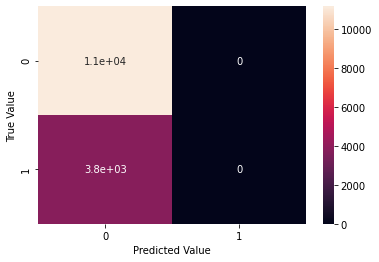

Time to run in minutes: 12.026987270514171
--------------------
cross validation score : [0.74428571 0.74442857 0.74457143 0.74442857 0.74428571]
--------------------
accuracy score : 0.7442
--------------------
classification report :               precision    recall  f1-score   support

           0       0.74      1.00      0.85     11163
           1       0.00      0.00      0.00      3837

    accuracy                           0.74     15000
   macro avg       0.37      0.50      0.43     15000
weighted avg       0.55      0.74      0.64     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# split the date
from sklearn.model_selection import train_test_split
X = sample_data.iloc[:, :-1]
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# SelectKBest chi2
X_train_fs, X_test_fs, fs = select_features_chi2(X_train, y_train, X_test)

# model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib




t1 = time.time()

clf = GridSearchCV(lr, {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0, .1, 1, 10, 100],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial']
}, cv=5)

clf.fit(X_train_fs, y_train)

t2 = time.time()



#Fit the model with the best parameters to the train data and make predictions
model = LogisticRegression(**clf.best_params_)
model.fit(X_train_fs, y_train)
predicitons = model.predict(X_test_fs)

# Save the model to drive
joblib.dump(model, 'drive/My Drive/NJ Transit Project/lr_model.joblib')

# apply metrics
cross_score = cross_val_score(model, X_train_fs, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### KNN Classification

**Important note:** KNN works by using distance. Because the variable are not meaningfully distributed, convering them to between a range of 0 to 1 will help the model run more effectively. 

**Analysis:** The KNN with SelectKBest model has a good accuracy score of 74%. The recall score indicates it is highly effective at predicting if a train will be on time, 98%, however, it does not do a good job at predicting if the train will be late, 4%. The model has a relatively high precision of 42% for predicting a late train. This indicates the model is predicting the train will be late relatively few times.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


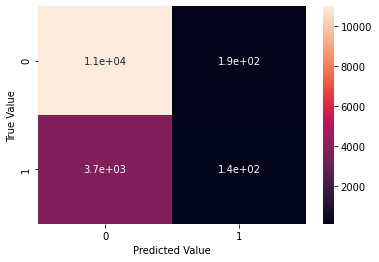

Time to run in minutes: 3.4889869968096416
--------------------
cross validation score : [0.74228571 0.74257143 0.74742857 0.74042857 0.74357143]
--------------------
accuracy score : 0.7399333333333333
--------------------
classification report :               precision    recall  f1-score   support

           0       0.75      0.98      0.85     11154
           1       0.42      0.04      0.06      3846

    accuracy                           0.74     15000
   macro avg       0.58      0.51      0.46     15000
weighted avg       0.66      0.74      0.65     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# split the date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = pd.DataFrame(normalize(sample_data.iloc[:, :-1]))
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

#SelectKBest chi2
X_train_fs, X_test_fs, fs = select_features_chi2(X_train, y_train, X_test)

# model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib


t1 = time.time()

clf = GridSearchCV(knn, {
    'n_neighbors' : [4,20],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    # p=1 is equivalent to using manhattan distance (distance measured in unit lengths at right angles)
    # p=2 is euclidean distance
    'p' : [1, 2]
}, cv=5)

clf.fit(X_train_fs, y_train)

t2 = time.time()


#Fit the model with the best parameters to the train data and make predictions
model = KNeighborsClassifier(**clf.best_params_)
model.fit(X_train_fs, y_train)
predicitons = model.predict(X_test_fs)

# Save the model to drive
joblib.dump(model, 'drive/My Drive/NJ Transit Project/knnc_model.joblib')

# apply metrics
cross_score = cross_val_score(model, X_train_fs, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### Decison Tree

**Analysis:** This model has an accuracy score of 70%. The recall scores indicate a strong ability for the model to correctly predict that a train will be on time with a score of 80%, however, the model is fairly good at correctly predicting if a train will be late, corerctly identifying a late train 42% of the time. It has a precision score of 42% when predicting a train will be late.  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Time to run in minutes: 0.12408339182535807


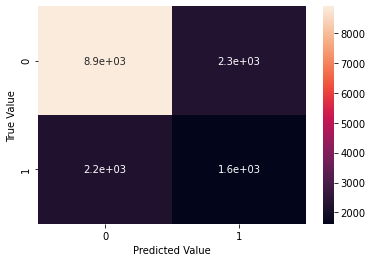

--------------------
cross validation score : [0.70157143 0.69742857 0.69557143 0.69985714 0.689     ]
--------------------
accuracy score : 0.7006
--------------------
classification report :               precision    recall  f1-score   support

           0       0.80      0.80      0.80     11163
           1       0.42      0.42      0.42      3837

    accuracy                           0.70     15000
   macro avg       0.61      0.61      0.61     15000
weighted avg       0.70      0.70      0.70     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# split the date
from sklearn.model_selection import train_test_split
X = sample_data.iloc[:, :-1]
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# SelectKBest chi2
X_train_fs, X_test_fs, fs = select_features_chi2(X_train, y_train, X_test)

# Model
from sklearn import tree
dtree = tree.DecisionTreeClassifier()

# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib

t1 = time.time()

clf = GridSearchCV(dtree, {
    # parameter grid, this can be done outside the function as well.
    # the overall format would be the same. {'argument': [inputs]}
    'criterion' : ['entropy'],
    'max_features' : np.arange(1,12),
    'splitter' : ['best', 'random']
}, cv=5)

# Fit the selected features and the to the target
clf.fit(X_train_fs, y_train)


t2 = time.time()
print(f'Time to run in minutes: {(t2-t1)/60}')


#Fit the model with the best parameters to the train data and make predictions
model = tree.DecisionTreeClassifier(**clf.best_params_)
model.fit(X_train_fs, y_train)
predicitons = model.predict(X_test_fs)

# Save the model to drive
joblib.dump(model, 'drive/My Drive/NJ Transit Project/dtree_model.joblib')

# apply metrics
cross_score = cross_val_score(model, X_train_fs, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### Random Forest

**Analysis:** This is one of the best models wuthing SelectKBest. It has an accuracy over 76%. It is highly effective at predicting when a train will be on time with a recall of  91% and it able to predict a late train correctly 31% of the time. The model appears to achieve the correct prediction of late trains by over predicting trains will be late, as reflected in a percision score for late trains of 56%.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


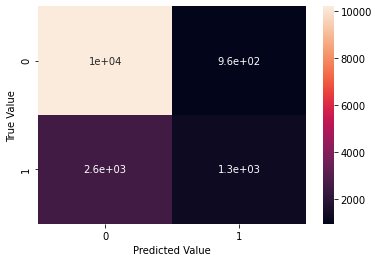

Time to run in minutes: 34.085498690605164
--------------------
cross validation score : [0.75914286 0.75228571 0.75628571 0.75685714 0.75885714]
--------------------
accuracy score : 0.7649333333333334
--------------------
classification report :               precision    recall  f1-score   support

           0       0.80      0.91      0.85     11163
           1       0.57      0.33      0.42      3837

    accuracy                           0.76     15000
   macro avg       0.68      0.62      0.64     15000
weighted avg       0.74      0.76      0.74     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# split the date
from sklearn.model_selection import train_test_split
X = sample_data.iloc[:, :-1]
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# SelectKBest chi2
X_train_fs, X_test_fs, fs = select_features_chi2(X_train, y_train, X_test)

# Model
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()

# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib

t1 = time.time()


clf = GridSearchCV(rfc, {
    # parameter grid, this can be done outside the function as well.
    # the overall format would be the same. {'argument': [inputs]}
    'n_estimators' : [10, 15, 20, 25, 30, 35, 40],
    'criterion' : ['entropy'],
    'max_features' : np.arange(1,12),
    'bootstrap' : [True, False]
}, cv=5)

# Fit the selected features and the to the target
clf.fit(X_train_fs, y_train)


t2 = time.time()

#Fit the model with the best parameters to the train data and make predictions
model = ensemble.RandomForestClassifier(**clf.best_params_)
model.fit(X_train_fs, y_train)
predicitons = model.predict(X_test_fs)

# Save the model to drive
joblib.dump(model, 'drive/My Drive/NJ Transit Project/rf_model.joblib')

# apply metrics
cross_score = cross_val_score(model, X_train_fs, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

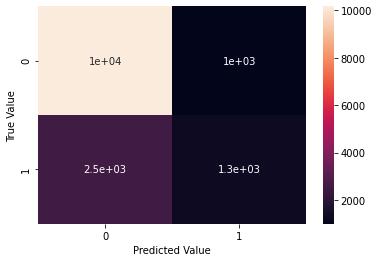

Time to run in minutes: 34.3956706682841
--------------------
cross validation score : [0.75885714 0.74785714 0.75271429 0.759      0.75857143]
--------------------
accuracy score : 0.7638
--------------------
classification report :               precision    recall  f1-score   support

           0       0.80      0.91      0.85     11163
           1       0.56      0.34      0.42      3837

    accuracy                           0.76     15000
   macro avg       0.68      0.62      0.64     15000
weighted avg       0.74      0.76      0.74     15000



In [ ]:
#Fit the model with the best parameters to the train data and make predictions
model = ensemble.RandomForestClassifier(**clf.best_params_)
model.fit(X_train_fs, y_train)
predicitons = model.predict(X_test_fs)

# Save the model to drive
joblib.dump(model, 'drive/My Drive/NJ Transit Project/rf_model.joblib')

# apply metrics
cross_score = cross_val_score(model, X_train_fs, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### SVM

**Important note:** SVM assumed data is distributed either betwenn 0 to 1 or -1 to 1. Data must be normalized.

**Analysis:** SVM appears to be effective with an accuracy of 74%. However, looking at the recall score it's clear it achieves this score by always assuming the train will be on time. It correctly predicts a train will be on time 100% of the time and if a train will be late 0% of the time. It is then no surprise that the precision reflects this by scoring 0% when predicting a train will be late. 

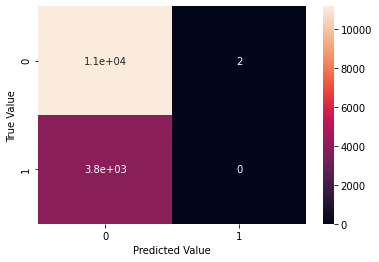

Time to run in minutes: 71.87818233569463
--------------------
cross validation score : [0.74585714 0.74571429 0.74571429 0.74557143 0.74557143]
--------------------
accuracy score : 0.7434666666666667
--------------------
classification report :               precision    recall  f1-score   support

           0       0.74      1.00      0.85     11154
           1       0.00      0.00      0.00      3846

    accuracy                           0.74     15000
   macro avg       0.37      0.50      0.43     15000
weighted avg       0.55      0.74      0.63     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Load the data
sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# Resample
from sklearn.utils import resample

# First, we'll separate observations from each class into different DataFrames.
df_majority = sample_data[sample_data['long_delay'] == 0]
df_minority = sample_data[sample_data['long_delay'] == 1]

# Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37252,    # to match majority class
                                 random_state=123)
  
# Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#df_upsampled['0.1'].value_counts()

sample_data = df_upsampled.copy()
#sample_data['0.1'].value_counts()

# split the date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = pd.DataFrame(normalize(sample_data.iloc[:, :-1]))
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# SelectKBest chi2
X_train_fs, X_test_fs, fs = select_features_chi2(X_train, y_train, X_test)

# Model
from sklearn.svm import SVC
svm = SVC()

# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib

t1 = time.time()


clf = GridSearchCV(svm, {
    # parameter grid, this can be done outside the function as well.
    # the overall format would be the same. {'argument': [inputs]}
    'C' : [1,2,5],
     #precomputer requires a square matix
    'kernel' : ['linear', 'polynomial', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
    'decision_function_shape' : ['ovo', 'ovr']
}, cv=5)

# Fit the selected features and the to the target
clf.fit(X_train_fs, y_train)


t2 = time.time()


#Fit the model with the best parameters to the train data and make predictions
model = SVC(**clf.best_params_)
model.fit(X_train_fs, y_train)
predicitons = model.predict(X_test_fs)

# Save the model to drive
joblib.dump(model, 'drive/My Drive/NJ Transit Project/svm_model.joblib')

# apply metrics
cross_score = cross_val_score(model, X_train_fs, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

# Section 4 - Supervised learning models with PCA

**Important note:** PCA works best with normally distributed data.

### LogisticRegression

**Analysis:** This model has an accuracy score of 50%. This is reflected in the precision score which indicates the model predicts a train will be late 50% of the time. Interestingly, it is able to get a recall score for predicting a train will be on time of 90% with this method. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from sklearn.utils import resample

# First, we'll separate observations from each class into different DataFrames.
df_majority = sample_data[sample_data['long_delay'] == 0]
df_minority = sample_data[sample_data['long_delay'] == 1]

# Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37252,    # to match majority class
                                 random_state=123)
  
# Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#df_upsampled['0.1'].value_counts()

sample_data = df_upsampled.copy()
#sample_data['0.1'].value_counts()

In [ ]:

# split the date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = pd.DataFrame(normalize(sample_data.iloc[:, :-1]))
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)


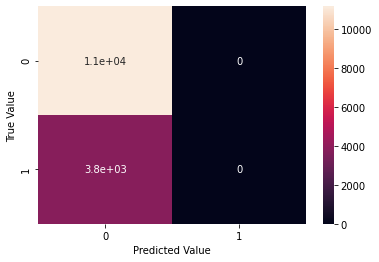

Time to run in minutes: 24.719298442204792
--------------------
cross validation score : [0.74442857 0.74442857 0.74442857 0.74442857 0.74457143]
--------------------
accuracy score : 0.7442
--------------------
classification report :               precision    recall  f1-score   support

           0       0.74      1.00      0.85     11163
           1       0.00      0.00      0.00      3837

    accuracy                           0.74     15000
   macro avg       0.37      0.50      0.43     15000
weighted avg       0.55      0.74      0.64     15000



In [ ]:
# model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Make a pipeline to test various n_components
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA()
pipe = Pipeline(steps = [('pca', pca), ('lr', lr)])

param_grid = {
    'pca__n_components' : [2,3,4,5,6,7],
    'lr__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'lr__C' : [0, .1, 1, 10, 100],
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__multi_class' : ['auto', 'ovr', 'multinomial']
}
# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib


t1 = time.time()

clf = GridSearchCV(pipe, param_grid, cv=5)

clf.fit(X_train, y_train)

t2 = time.time()



#Fit the model with the best parameters to the train data and make predictions
pipe_model = pipe.set_params(**clf.best_params_)
pipe_model.fit(X_train, y_train)
predicitons = pipe_model.predict(X_test)

# Save the model to drive
joblib.dump(pipe_model, 'drive/My Drive/NJ Transit Project/lr_pca_model.joblib')

# apply metrics
cross_score = cross_val_score(pipe_model, X_train, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

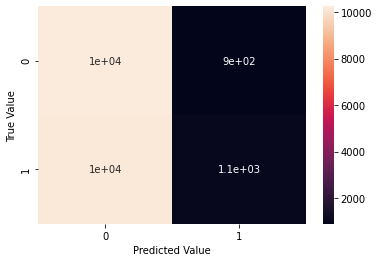

Time to run in minutes: 46.57203991015752
--------------------
cross validation score : [0.50905953 0.51327773 0.5093001  0.51112176 0.50575264]
--------------------
accuracy score : 0.5059055118110236
--------------------
classification report :               precision    recall  f1-score   support

           0       0.50      0.92      0.65     11141
           1       0.54      0.10      0.16     11211

    accuracy                           0.51     22352
   macro avg       0.52      0.51      0.41     22352
weighted avg       0.52      0.51      0.41     22352



In [ ]:
# apply metrics
cross_score = cross_val_score(pipe_model, X_train, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### KNN Classifier

**Analysis:** This model achieves an accuracy score of 74%. Based on the recall score this model is very good at predicting if a train will be on time, 91%, however it is not effective at predicting when a train will be laetting a recall of 3%

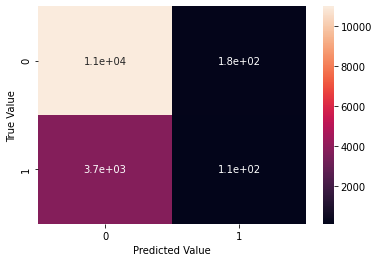

Time to run in minutes: 18.89694879849752
--------------------
cross validation score : [0.744      0.74257143 0.74214286 0.74142857 0.74557143]
--------------------
accuracy score : 0.7391333333333333
--------------------
classification report :               precision    recall  f1-score   support

           0       0.75      0.98      0.85     11154
           1       0.39      0.03      0.05      3846

    accuracy                           0.74     15000
   macro avg       0.57      0.51      0.45     15000
weighted avg       0.65      0.74      0.65     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# split the date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = pd.DataFrame(normalize(sample_data.iloc[:, :-1]))
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Make a pipeline to test various n_components
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA()
pipe = Pipeline(steps = [('pca', pca), ('knn', knn)])

param_grid = {
    'pca__n_components' : [2,3,4,5,6,7],
    'knn__n_neighbors' : [4,20],
    'knn__weights' : ['uniform', 'distance'],
    'knn__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
     p=1 is equivalent to using manhattan distance (distance measured in unit lengths at right angles)
     p=2 is euclidean distance
    'knn__p' : [1, 2]
}
# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib


t1 = time.time()

clf = GridSearchCV(pipe, param_grid, cv=5)

clf.fit(X_train, y_train)

t2 = time.time()



#Fit the model with the best parameters to the train data and make predictions
pipe_model = pipe.set_params(**clf.best_params_)
pipe_model.fit(X_train, y_train)
predicitons = pipe_model.predict(X_test)

# Save the model to drive
joblib.dump(pipe_model, 'drive/My Drive/NJ Transit Project/knn_pca_model.joblib')

# apply metrics
cross_score = cross_val_score(pipe_model, X_train, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### Decision Tree

**Analysis:** This model has an accuracy of 67%. This is mainly due to the model predicting the train will be on time. The model is relatively ineffective at correctly predicting the train will be late with a recall of 26% and a precision of 33%

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


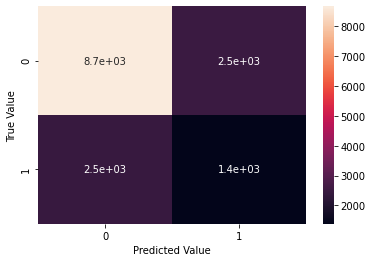

Time to run in minutes: 1.8573022484779358
--------------------
cross validation score : [0.67042857 0.66642857 0.67028571 0.67128571 0.66514286]
--------------------
accuracy score : 0.6700666666666667
--------------------
classification report :               precision    recall  f1-score   support

           0       0.78      0.78      0.78     11163
           1       0.36      0.36      0.36      3837

    accuracy                           0.67     15000
   macro avg       0.57      0.57      0.57     15000
weighted avg       0.67      0.67      0.67     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# split the date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = pd.DataFrame(normalize(sample_data.iloc[:, :-1]))
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# model
from sklearn import tree
dtree = tree.DecisionTreeClassifier()

# Make a pipeline to test various n_components
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA()
pipe = Pipeline(steps = [('pca', pca), ('dtree', dtree)])

param_grid = {
    'pca__n_components' : [2,3,4,5,6,7],
    'dtree__criterion' : ['entropy'],
    'dtree__max_features' : np.arange(1,12),
    'dtree__splitter' : ['best', 'random']
}
# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib


t1 = time.time()

clf = GridSearchCV(pipe, param_grid, cv=5)

clf.fit(X_train, y_train)

# Plot the PCA spectrum
#pca.fit(X_train)

t2 = time.time()



#Fit the model with the best parameters to the train data and make predictions
pipe_model = pipe.set_params(**clf.best_params_)
pipe_model.fit(X_train, y_train)
predicitons = pipe_model.predict(X_test)

# Save the model to drive
joblib.dump(pipe_model, 'drive/My Drive/NJ Transit Project/dtree_pca_model.joblib')

# apply metrics
cross_score = cross_val_score(pipe_model, X_train, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### Random Forest

**Analysis:** This model has an overall accuracy of 72%. Like the others, it ranks highly in its ability to predict a train will be on time but does not correctly predict when a train will be late well. Its recall and precision for predicting a train will be late are 11% and 38%.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


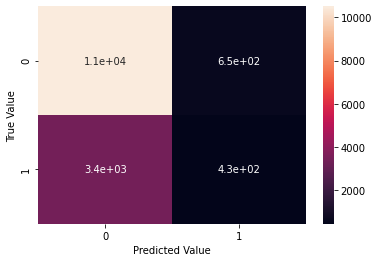

Time to run in minutes: 38.55929986635844
--------------------
cross validation score : [0.72128571 0.72385714 0.71685714 0.72971429 0.72157143]
--------------------
accuracy score : 0.7295333333333334
--------------------
classification report :               precision    recall  f1-score   support

           0       0.76      0.94      0.84     11163
           1       0.40      0.11      0.17      3837

    accuracy                           0.73     15000
   macro avg       0.58      0.53      0.51     15000
weighted avg       0.66      0.73      0.67     15000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# split the date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = pd.DataFrame(normalize(sample_data.iloc[:, :-1]))
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# model
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()

# Make a pipeline to test various n_components
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA()
pipe = Pipeline(steps = [('pca', pca), ('rfc', rfc)])

param_grid = {
    'pca__n_components' : [2,3],
    'rfc__n_estimators' : [10, 15, 20, 25, 30, 35, 40],
    'rfc__criterion' : ['entropy'],
    'rfc__max_features' : np.arange(1,12),
    'rfc__bootstrap' : [True, False]
}
# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib


t1 = time.time()

clf = GridSearchCV(pipe, param_grid, cv=5)

clf.fit(X_train, y_train)

t2 = time.time()



#Fit the model with the best parameters to the train data and make predictions
pipe_model = pipe.set_params(**clf.best_params_)
pipe_model.fit(X_train, y_train)
predicitons = pipe_model.predict(X_test)

# Save the model to drive
joblib.dump(pipe_model, 'drive/My Drive/NJ Transit Project/rf_pca_model.joblib')

# apply metrics
cross_score = cross_val_score(pipe_model, X_train, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

### SVM

**Note on SVM:** The SVM ran very slowly when I used it on the data with PCA. I found a work-around with thundersvm which uses the GPU to process a SVM. The code to set up the machine to run thundsvm is below in the first cell


In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls  # Check if required cuda 9.0 amd64-deb file is downloaded
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0

pip install thundersvm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


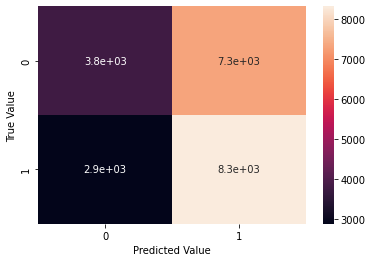

Time to run in minutes: 3.823232555389404
--------------------
cross validation score : [0.53673509 0.54076348 0.53942068 0.53779014 0.53726619]
--------------------
accuracy score : 0.5420284665652135
--------------------
classification report :               precision    recall  f1-score   support

           0       0.57      0.34      0.43     11128
           1       0.53      0.74      0.62     11214

    accuracy                           0.54     22342
   macro avg       0.55      0.54      0.52     22342
weighted avg       0.55      0.54      0.52     22342



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns = sample_data.iloc[:,:1])

# Resample
from sklearn.utils import resample

# First, we'll separate observations from each class into different DataFrames.
df_majority = sample_data[sample_data['long_delay'] == 0]
df_minority = sample_data[sample_data['long_delay'] == 1]

# Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37252,    # to match majority class
                                 random_state=123)
  
# Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#df_upsampled['0.1'].value_counts()

sample_data = df_upsampled.copy()
#sample_data['0.1'].value_counts()

# split the date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X = pd.DataFrame(normalize(sample_data.iloc[:, :-1]))
y = sample_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

# Model
from thundersvm import SVC
svm = SVC()

# Make a pipeline to test various n_components
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA()
pipe = Pipeline(steps = [('pca', pca), ('svm', svm)])

param_grid = {
    'pca__n_components' : [2],
    'svm__C' : [1.0,2.0],
    'svm__kernel' : ['linear', 'polynomial', 'rbf', 'sigmoid'],
    'svm__gamma' : ['scale', 'auto'],
    'svm__decision_function_shape' : ['ovo', 'ovr']
}
# gridsearch and metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

# saving model
import os
import joblib


t1 = time.time()

clf = GridSearchCV(pipe, param_grid, cv=5)

clf.fit(X_train, y_train)

t2 = time.time()



#Fit the model with the best parameters to the train data and make predictions
pipe_model = pipe.set_params(**clf.best_params_)
pipe_model.fit(X_train, y_train)
predicitons = pipe_model.predict(X_test)

# Save the model to drive
joblib.dump(pipe_model, 'drive/My Drive/NJ Transit Project/svm_pca_model.joblib')

# apply metrics
cross_score = cross_val_score(pipe_model, X_train, y_train, cv=5)
acc_score = accuracy_score(y_test, predicitons)
class_report = metrics.classification_report(y_test, predicitons)
conf_matrix = metrics.confusion_matrix(y_test, predicitons)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print(f'Time to run in minutes: {(t2-t1)/60}')
print('--------------------')
print(f'cross validation score : {cross_score}')
print('--------------------')
print(f'accuracy score : {acc_score}')
print('--------------------')
print(f'classification report : {class_report}')

# Section 5 - Unsupervised Learning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, MiniBatchKMeans

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns=sample_data.iloc[:,:1])
sample_data.head()

Mounted at /content/drive


,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,119.0,251.0,12.0,153.0,2.0,680.0,1.0,1.0,0
1,533.0,579.0,4.0,102.0,37.0,513.0,1.0,7.0,0
2,132.0,813.0,8.0,74.0,120.0,705.0,1.0,6.0,1
3,402.0,34.0,9.0,145.0,73.0,657.0,1.0,3.0,1
4,458.0,32.0,25.0,135.0,59.0,605.0,2.0,3.0,0


## Part 1 - K-means and PCA - Normalized data

### Dimensionality reduction with normalized data.

In [ ]:
X = pd.DataFrame(normalize(sample_data))

#9 is the total number of components and it will be used to check for which components best explain the variance
pca = PCA(n_components=9)
pca_components = pca.fit_transform(X)

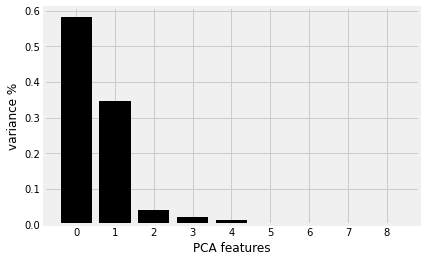

In [ ]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(pca_components)

#The variance dropoff is at 3rd component

Text(0, 0.5, 'PCA 2')

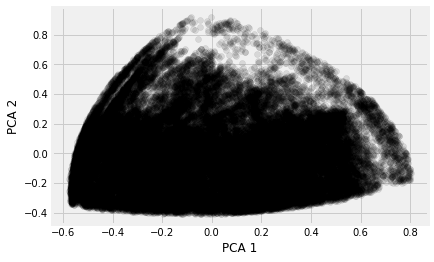

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#The data does not appear to have clear clusters.

### Kmeans with normalized data and 2 components

**Analysis:** The silhouette score drops off off immediately with more clusters. The highest is 2 clusters. In contrast, the sum of squares due to error (SSE) continues to drop, indicating that more clusters improves the models ability to predict. 

In [ ]:
X = pd.DataFrame(normalize(sample_data))

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

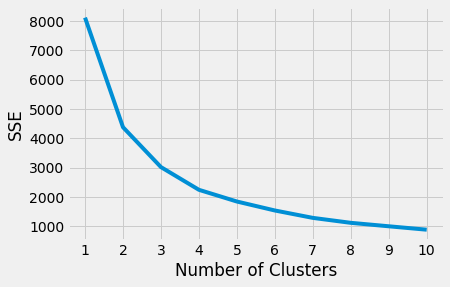

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

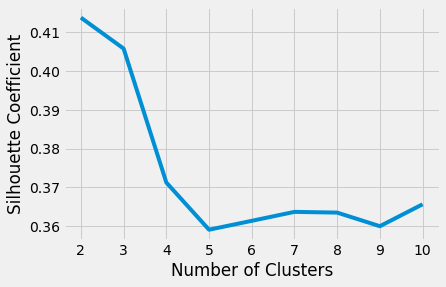

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient - why is this?
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     score = metrics.silhouette_score(pca_components, kmeans.labels_)
     silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Checking for consistency 
from sklearn.model_selection import train_test_split

In [ ]:
X_std = pd.DataFrame(normalize(sample_data))

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [ ]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(4, 11):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

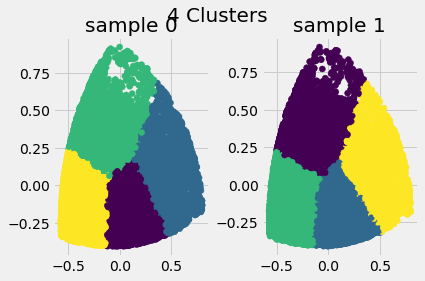

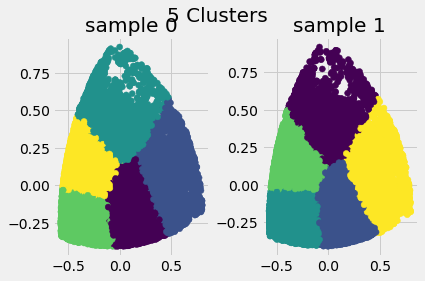

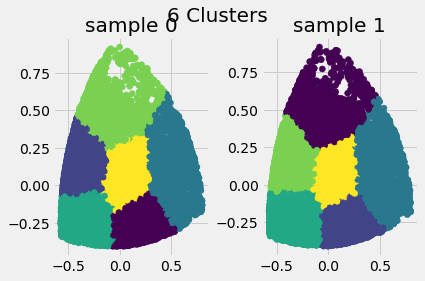

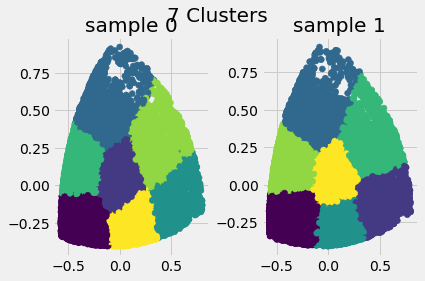

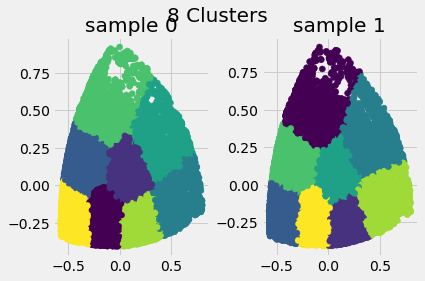

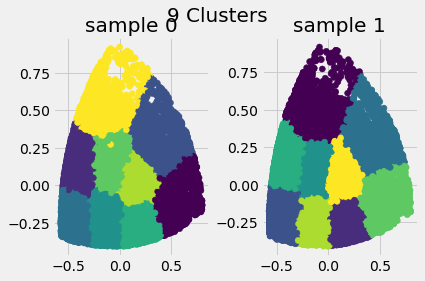

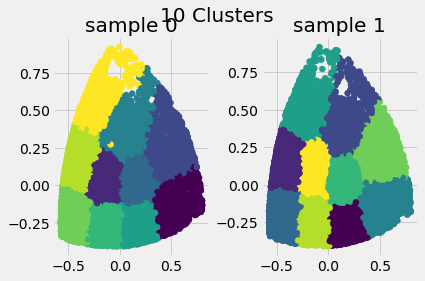

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(4, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

### Kmeans with normalized data and 3 components

**Analysis:** The silhouette score drops off off immediately with more clusters. The highest is 2 clusters. In contrast, the sum of squares due to error (SSE) continues to drop, indicating that more clusters improves the models ability to predict.

In [ ]:
X = pd.DataFrame(normalize(sample_data))

pca = PCA(n_components=3)
pca_components = pca.fit_transform(X)

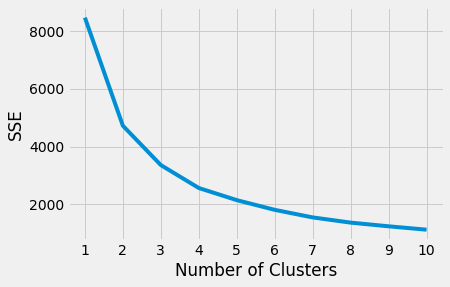

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

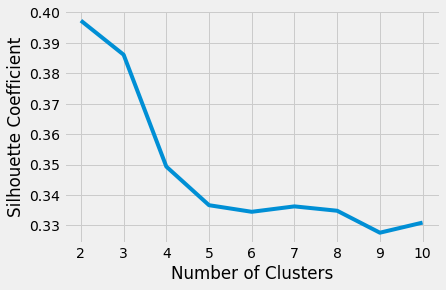

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient - why is this?
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     score = metrics.silhouette_score(pca_components, kmeans.labels_)
     silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Checking for consistency 

In [ ]:
X_std = pd.DataFrame(normalize(sample_data))

# Computing the first principal components
#pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [ ]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(4, 11):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

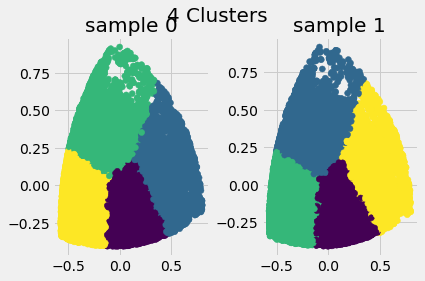

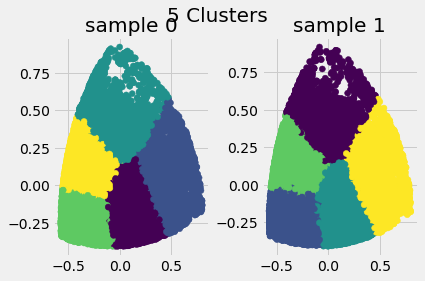

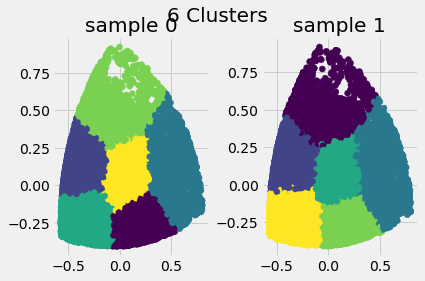

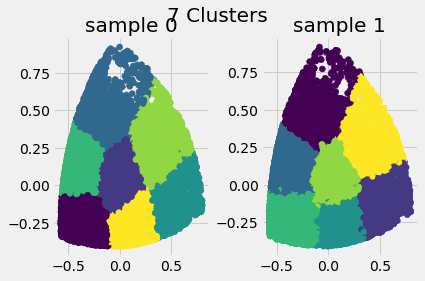

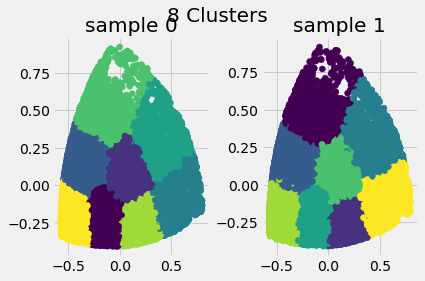

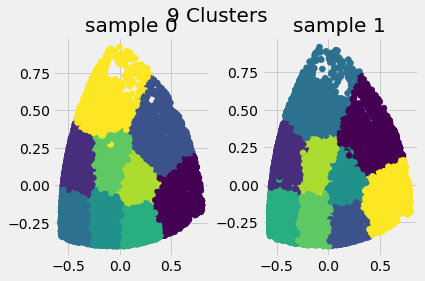

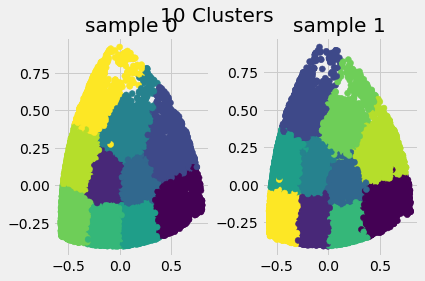

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(4, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

### Application

In [ ]:
X = pd.DataFrame(normalize(sample_data))

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
clusters = kmeans.fit_predict(pca_components)

In [ ]:
X.columns = sample_data.columns
X

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,0.158579,0.334482,0.015991,0.203887,0.002665,0.906167,0.001333,0.001333,0.000000
1,0.563607,0.612248,0.004230,0.107857,0.039125,0.542459,0.001057,0.007402,0.000000
2,0.120731,0.743592,0.007317,0.067682,0.109755,0.644812,0.000915,0.005488,0.000915
3,0.510189,0.043150,0.011422,0.184023,0.092646,0.833816,0.001269,0.003807,0.001269
4,0.591691,0.041341,0.032298,0.174407,0.076222,0.781601,0.002584,0.003876,0.000000
...,...,...,...,...,...,...,...,...,...
49995,0.492271,0.092532,0.024675,0.012338,0.018506,0.864867,0.001234,0.002468,0.000000
49996,0.045308,0.468501,0.012532,0.065552,0.066516,0.877234,0.001928,0.005784,0.000000
49997,0.258184,0.916816,0.004391,0.065863,0.070254,0.288920,0.000878,0.004391,0.000878
49998,0.175001,0.389845,0.001563,0.053125,0.100782,0.896878,0.000781,0.004688,0.000781


In [ ]:
sample_data

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay,clusters
0,119.0,251.0,12.0,153.0,2.0,680.0,1.0,1.0,0,3
1,533.0,579.0,4.0,102.0,37.0,513.0,1.0,7.0,0,1
2,132.0,813.0,8.0,74.0,120.0,705.0,1.0,6.0,1,0
3,402.0,34.0,9.0,145.0,73.0,657.0,1.0,3.0,1,3
4,458.0,32.0,25.0,135.0,59.0,605.0,2.0,3.0,0,2
...,...,...,...,...,...,...,...,...,...,...
49995,399.0,75.0,20.0,10.0,15.0,701.0,1.0,2.0,0,3
49996,47.0,486.0,13.0,68.0,69.0,910.0,2.0,6.0,0,0
49997,294.0,1044.0,5.0,75.0,80.0,329.0,1.0,5.0,1,1
49998,224.0,499.0,2.0,68.0,129.0,1148.0,1.0,6.0,1,3


In [ ]:
sample_data['clusters'] = clusters

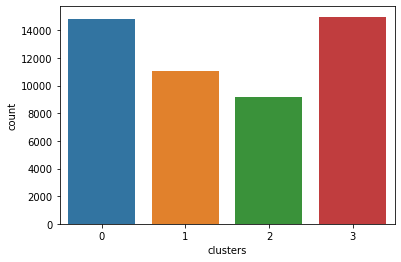

In [ ]:
sns.countplot(x=sample_data['clusters'])

In [ ]:
x = 1
friday_df = pd.DataFrame()
# The code runs much faster if I limit the range between 0 and the greatest complete factor of 7 (In this case 805).
for i in range(len(sample_data)):
  df = sample_data.loc[(sample_data['date'] == 0 + x)]
  
  friday_df = friday_df.append(df)

  x = x+7

friday_df

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay,clusters
456,1.0,211.0,11.0,64.0,93.0,296.0,1.0,4.0,0,0
832,1.0,281.0,4.0,70.0,29.0,516.0,1.0,3.0,0,0
1316,1.0,941.0,10.0,28.0,132.0,800.0,1.0,10.0,0,0
1569,1.0,480.0,11.0,0.0,54.0,700.0,1.0,6.0,0,0
2637,1.0,68.0,9.0,75.0,80.0,443.0,1.0,2.0,1,3
...,...,...,...,...,...,...,...,...,...,...
45939,806.0,1169.0,6.0,37.0,65.0,568.0,1.0,6.0,0,1
47480,806.0,354.0,17.0,73.0,145.0,446.0,2.0,3.0,0,2
47988,806.0,979.0,9.0,118.0,32.0,1144.0,1.0,10.0,0,0
48448,806.0,1170.0,5.0,78.0,54.0,732.0,1.0,6.0,0,1


In [ ]:
print(friday_df.line.unique())
print(friday_df.line.nunique())

[ 4.  3. 10.  6.  2.  0.  1.  8.  7.  5.  9.]
11


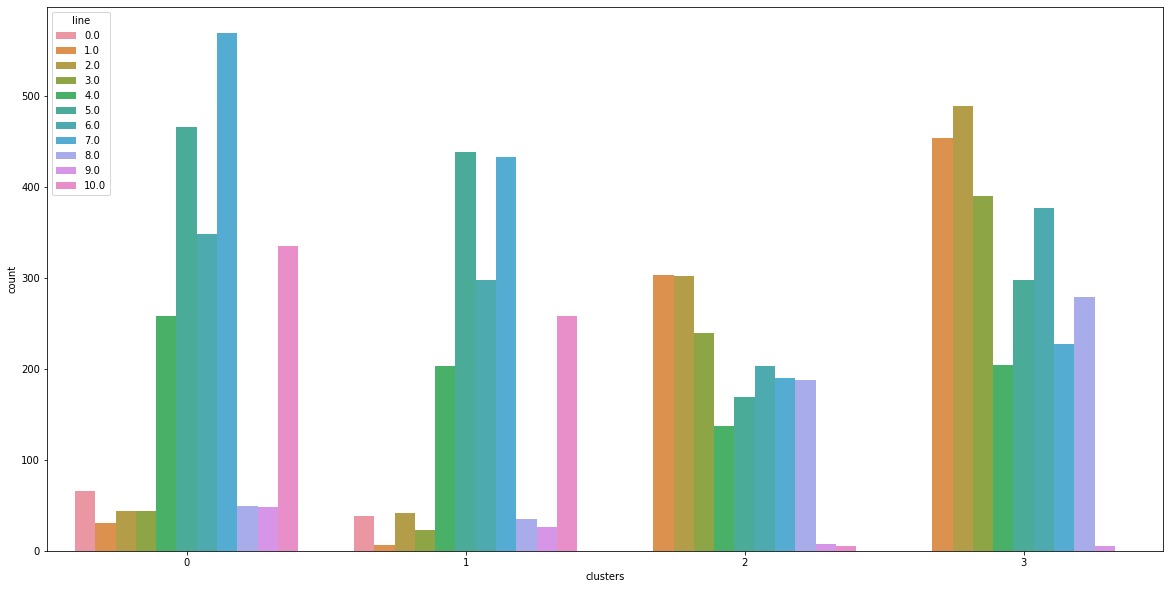

In [ ]:
#ASK MENTOR : is this what he meant by having all the lines on one chart?

plt.figure(figsize=(20,10))
sns.countplot(x='clusters', hue='line', data=friday_df)

## Part 2 - K-means and PCA - Standardized data

### Dimentionality reduction with StandardScalar

In [ ]:
X = StandardScaler().fit_transform(sample_data)

pca = PCA(n_components=9)
pca_components = pca.fit_transform(X)

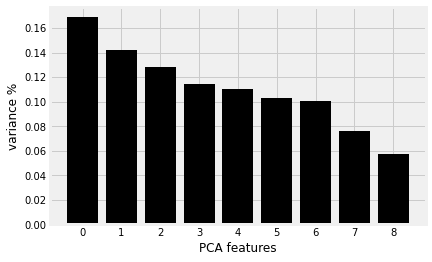

In [ ]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(pca_components)

#There is no clear variance dropoff with StandardScalar.

Text(0, 0.5, 'PCA 2')

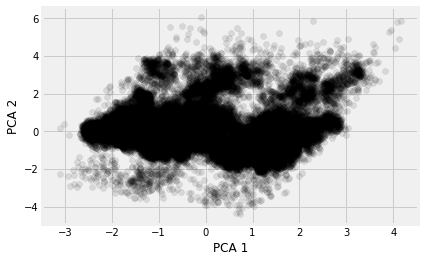

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Kmeans with standardized data and 2 components

**Analysis:** This model has the best silhouette score. It peaks at 3 clusters and then falls off. Interestinglly, the SSE is relatively high compared to the normalized data. 

In [ ]:
X = StandardScaler().fit_transform(sample_data)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

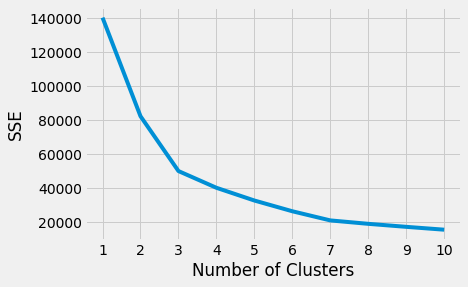

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

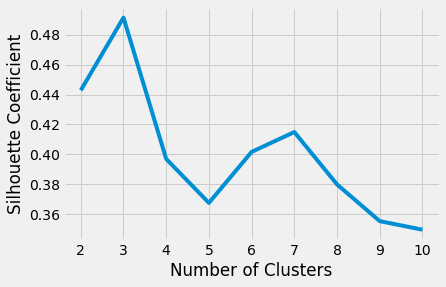

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient - why is this?
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     score = metrics.silhouette_score(pca_components, kmeans.labels_)
     silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Checking for consistency 

In [ ]:
X_std = StandardScaler().fit_transform(sample_data)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [ ]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(4, 11):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

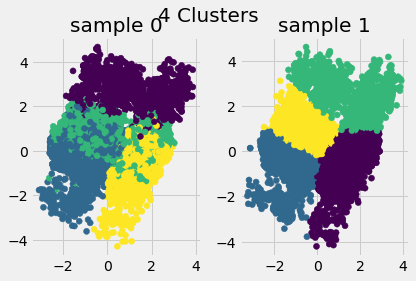

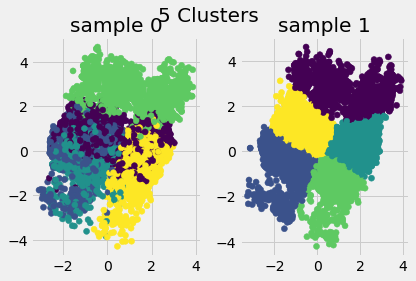

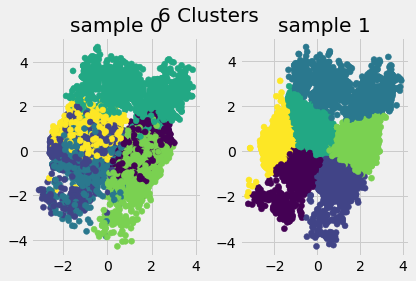

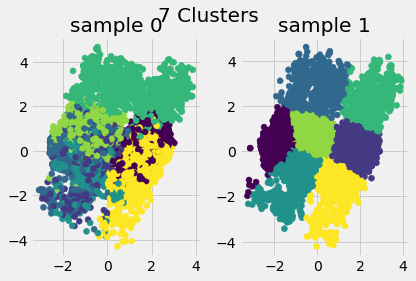

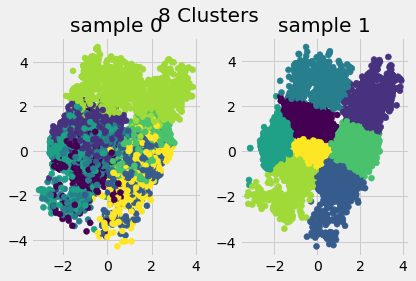

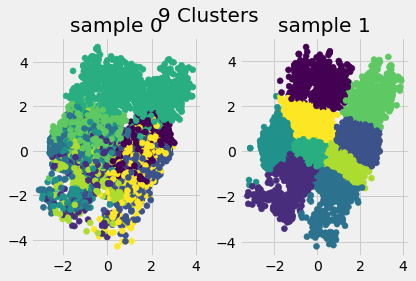

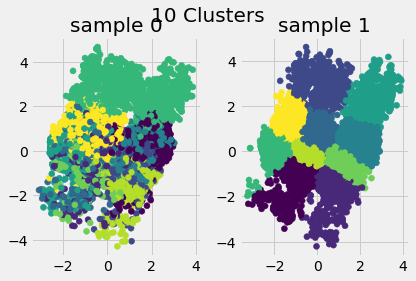

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(4, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

### Kmeans with standardized data and 3 components

**Analysis:** This model also has a peak in the silhouette score with 3 clusters but it still scores lower than when 2 PCA components are used. 

In [ ]:
X = StandardScaler().fit_transform(sample_data)

pca = PCA(n_components=3)
pca_components = pca.fit_transform(X)

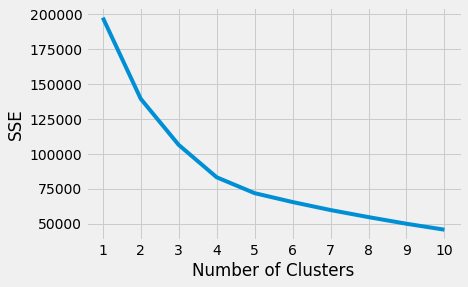

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

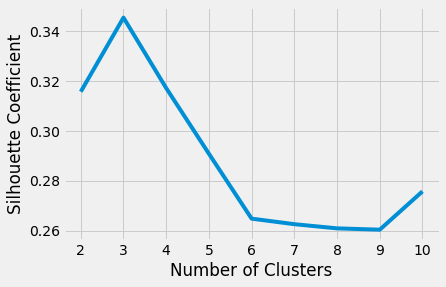

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient - why is this?
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(pca_components)
     score = metrics.silhouette_score(pca_components, kmeans.labels_)
     silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Checking for consistency 

In [ ]:
X_std = StandardScaler().fit_transform(sample_data)

# Computing the first principal components
#pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [ ]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(4, 11):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

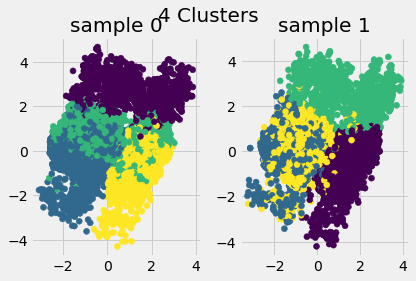

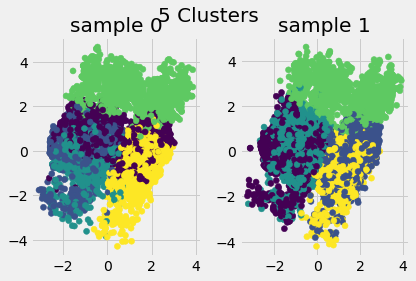

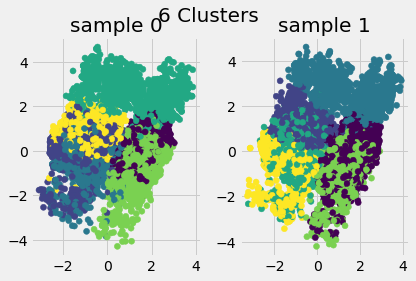

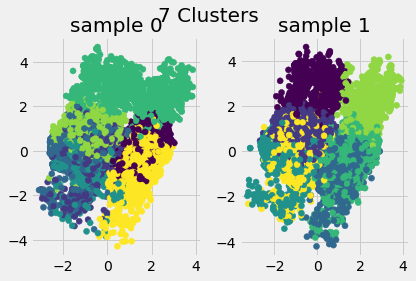

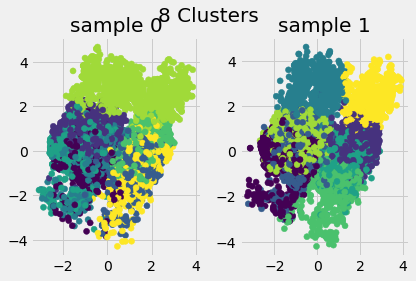

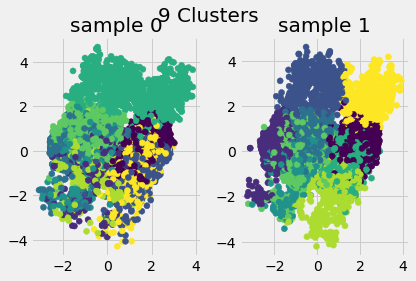

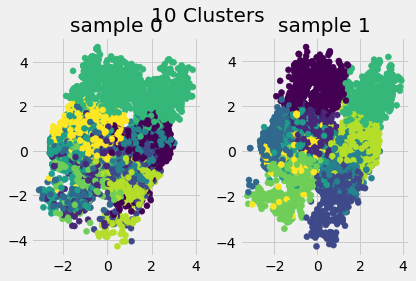

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(4, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

### Application

In [ ]:
X = StandardScaler().fit_transform(sample_data)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
clusters = kmeans.fit_predict(pca_components)

In [ ]:
sample_data['clusters'] = clusters
sample_data

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay,clusters
0,119.0,251.0,12.0,153.0,2.0,680.0,1.0,1.0,0,0
1,533.0,579.0,4.0,102.0,37.0,513.0,1.0,7.0,0,1
2,132.0,813.0,8.0,74.0,120.0,705.0,1.0,6.0,1,1
3,402.0,34.0,9.0,145.0,73.0,657.0,1.0,3.0,1,0
4,458.0,32.0,25.0,135.0,59.0,605.0,2.0,3.0,0,2
...,...,...,...,...,...,...,...,...,...,...
49995,399.0,75.0,20.0,10.0,15.0,701.0,1.0,2.0,0,0
49996,47.0,486.0,13.0,68.0,69.0,910.0,2.0,6.0,0,2
49997,294.0,1044.0,5.0,75.0,80.0,329.0,1.0,5.0,1,1
49998,224.0,499.0,2.0,68.0,129.0,1148.0,1.0,6.0,1,1


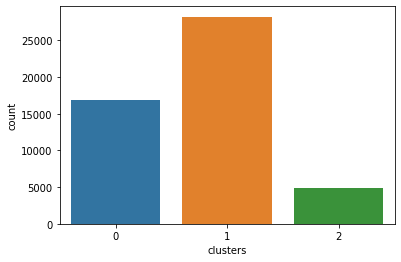

In [ ]:
sns.countplot(x=sample_data['clusters'])

In [ ]:
x = 1
friday_df = pd.DataFrame()
# The code runs much faster if I limit the range between 0 and the greatest complete factor of 7 (In this case 805).
for i in range(len(sample_data)):
  df = sample_data.loc[(sample_data['date'] == 0 + x)]
  
  friday_df = friday_df.append(df)

  x = x+7

friday_df

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay,clusters
456,1.0,211.0,11.0,64.0,93.0,296.0,1.0,4.0,0,0
832,1.0,281.0,4.0,70.0,29.0,516.0,1.0,3.0,0,0
1316,1.0,941.0,10.0,28.0,132.0,800.0,1.0,10.0,0,1
1569,1.0,480.0,11.0,0.0,54.0,700.0,1.0,6.0,0,0
2637,1.0,68.0,9.0,75.0,80.0,443.0,1.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...
45939,806.0,1169.0,6.0,37.0,65.0,568.0,1.0,6.0,0,1
47480,806.0,354.0,17.0,73.0,145.0,446.0,2.0,3.0,0,2
47988,806.0,979.0,9.0,118.0,32.0,1144.0,1.0,10.0,0,1
48448,806.0,1170.0,5.0,78.0,54.0,732.0,1.0,6.0,0,1


In [ ]:
print(friday_df.line.unique())
print(friday_df.line.nunique())

[ 4.  3. 10.  6.  2.  0.  1.  8.  7.  5.  9.]
11


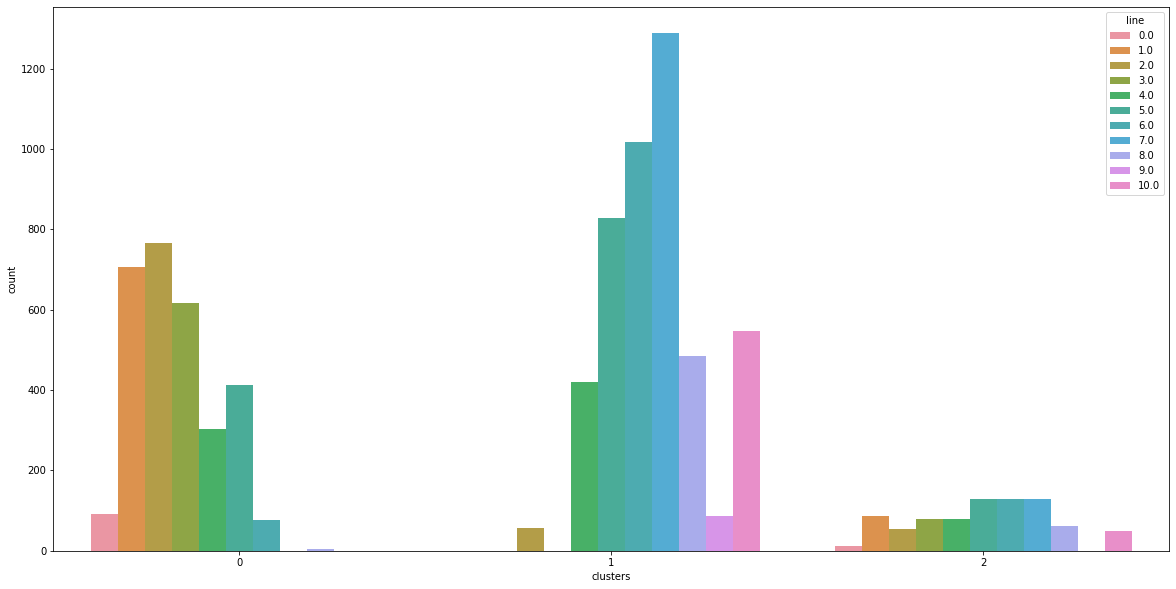

In [ ]:
#ASK MENTOR : is this what he meant by having all the lines on one chart?

plt.figure(figsize=(20,10))
sns.countplot(x='clusters', hue='line', data=friday_df)

## GMM setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn.manifold import TSNE

from sklearn.mixture import GaussianMixture

from google.colab import drive
drive.mount('/content/drive')

sample_data = pd.read_csv('drive/My Drive/NJ Transit Project/sample_data.csv')
sample_data = sample_data.drop(columns=sample_data.iloc[:,:1])
sample_data.head()

## GMM with TSNE - Normalized

### Dimensionality reduction with normalized data.

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X = pd.DataFrame(normalize(sample_data))

#9 is the total number of components and it will be used to check for which components best explain the variance
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X)

In [ ]:
y = sample_data.long_delay

In [ ]:
y.shape

(50000,)

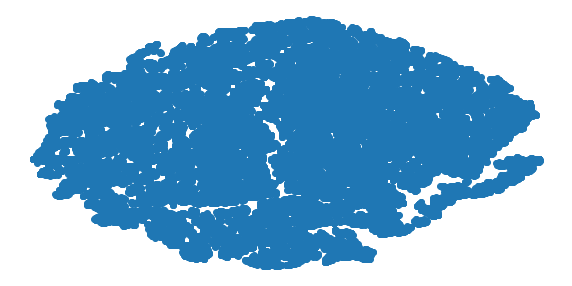

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### GMM with normalized data and 2 components

In [ ]:
X_std = pd.DataFrame(normalize(sample_data))

# Computing the first principal components
#tsne = TSNE(n_components=2)
#X_tsne = tsne.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_tsnehalf1, X_tsnehalf2 = train_test_split(
    X,
    tsne_results,
    test_size=0.5,
    random_state=13579)

In [ ]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_tsnehalf1),
    (X_half2, X_tsnehalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(4, 11):
        pred = GaussianMixture(n_components=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

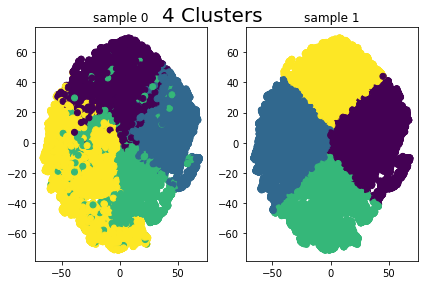

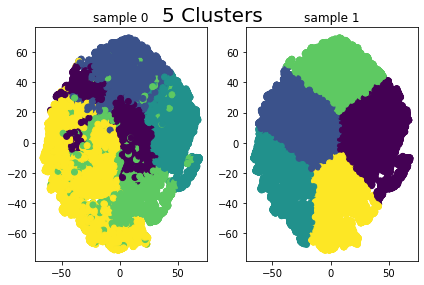

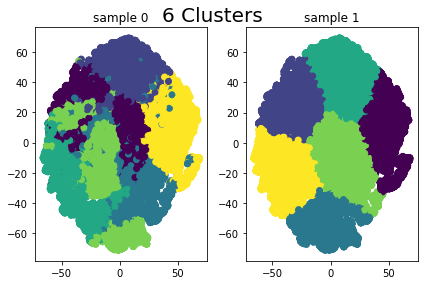

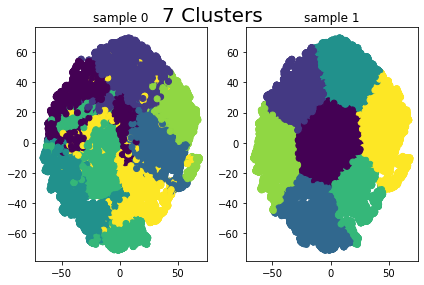

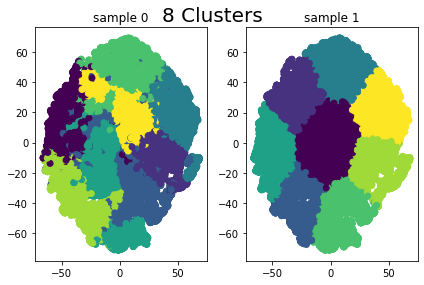

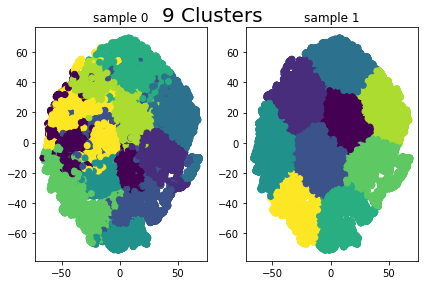

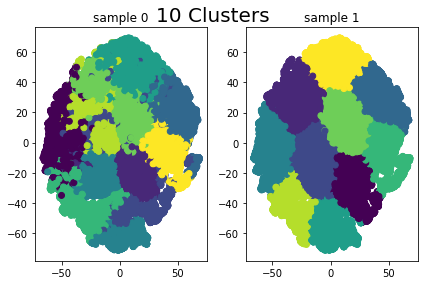

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(4, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

### GMM with normalized data and 3 components

In [ ]:
tsne = TSNE(n_components=3)
tsne_results = tsne.fit_transform(X)

In [ ]:
X_std = pd.DataFrame(normalize(sample_data))

# Computing the first principal components
#tsne = TSNE(n_components=2)
#X_tsne = tsne.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_tsnehalf1, X_tsnehalf2 = train_test_split(
    X_std,
    tsne_results,
    test_size=0.5,
    random_state=13579)

In [ ]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_tsnehalf1),
    (X_half2, X_tsnehalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(4, 11):
        pred = GaussianMixture(n_components=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

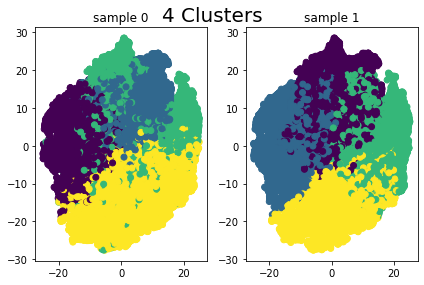

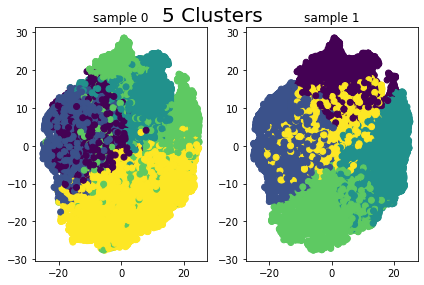

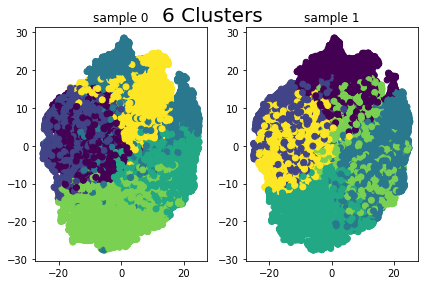

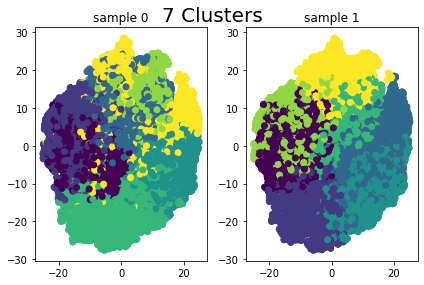

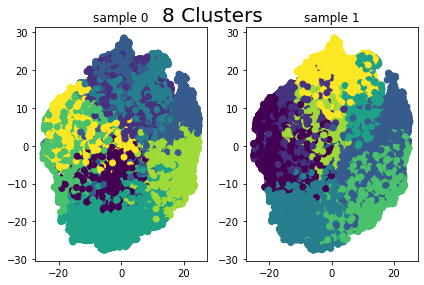

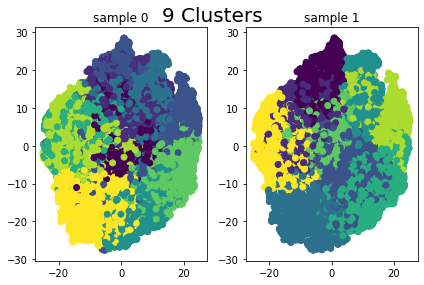

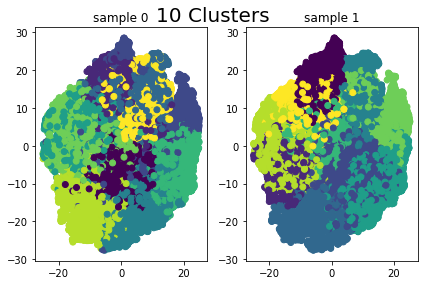

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(4, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

### application

In [ ]:
X = pd.DataFrame(normalize(sample_data))

#9 is the total number of components and it will be used to check for which components best explain the variance
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X)

gmm = GaussianMixture(n_components=4)
clusters = gmm.fit_predict(tsne_results)

In [ ]:
sample_data['clusters'] = clusters

In [ ]:
sample_data

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay,clusters
0,119.0,251.0,12.0,153.0,2.0,680.0,1.0,1.0,0,0
1,533.0,579.0,4.0,102.0,37.0,513.0,1.0,7.0,0,1
2,132.0,813.0,8.0,74.0,120.0,705.0,1.0,6.0,1,2
3,402.0,34.0,9.0,145.0,73.0,657.0,1.0,3.0,1,2
4,458.0,32.0,25.0,135.0,59.0,605.0,2.0,3.0,0,2
...,...,...,...,...,...,...,...,...,...,...
49995,399.0,75.0,20.0,10.0,15.0,701.0,1.0,2.0,0,2
49996,47.0,486.0,13.0,68.0,69.0,910.0,2.0,6.0,0,0
49997,294.0,1044.0,5.0,75.0,80.0,329.0,1.0,5.0,1,2
49998,224.0,499.0,2.0,68.0,129.0,1148.0,1.0,6.0,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


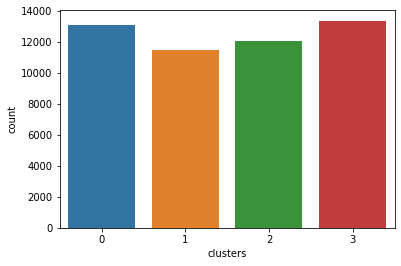

In [ ]:
sns.countplot(sample_data['clusters'])

In [ ]:
# March 1st was a thursday so march 2nd is a friday. So If I want to look at fridays I would need every number that is 
# data = 1+7x in the sample data.

x = 1
friday_df = pd.DataFrame()
# The code runs much faster if I limit the range between 0 and the greatest complete factor of 7 (In this case 805).
for i in range(len(sample_data)):
  df = sample_data.loc[(sample_data['date'] == 0 + x)]
  
  friday_df = friday_df.append(df)

  x = x+7

friday_df

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay,clusters
456,1.0,211.0,11.0,64.0,93.0,296.0,1.0,4.0,0,1
832,1.0,281.0,4.0,70.0,29.0,516.0,1.0,3.0,0,0
1316,1.0,941.0,10.0,28.0,132.0,800.0,1.0,10.0,0,2
1569,1.0,480.0,11.0,0.0,54.0,700.0,1.0,6.0,0,2
2637,1.0,68.0,9.0,75.0,80.0,443.0,1.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...
45939,806.0,1169.0,6.0,37.0,65.0,568.0,1.0,6.0,0,2
47480,806.0,354.0,17.0,73.0,145.0,446.0,2.0,3.0,0,3
47988,806.0,979.0,9.0,118.0,32.0,1144.0,1.0,10.0,0,1
48448,806.0,1170.0,5.0,78.0,54.0,732.0,1.0,6.0,0,1


In [ ]:
print(friday_df.line.unique())
print(friday_df.line.nunique())

[ 4  3 10  6  2  0  1  8  7  5  9]
11


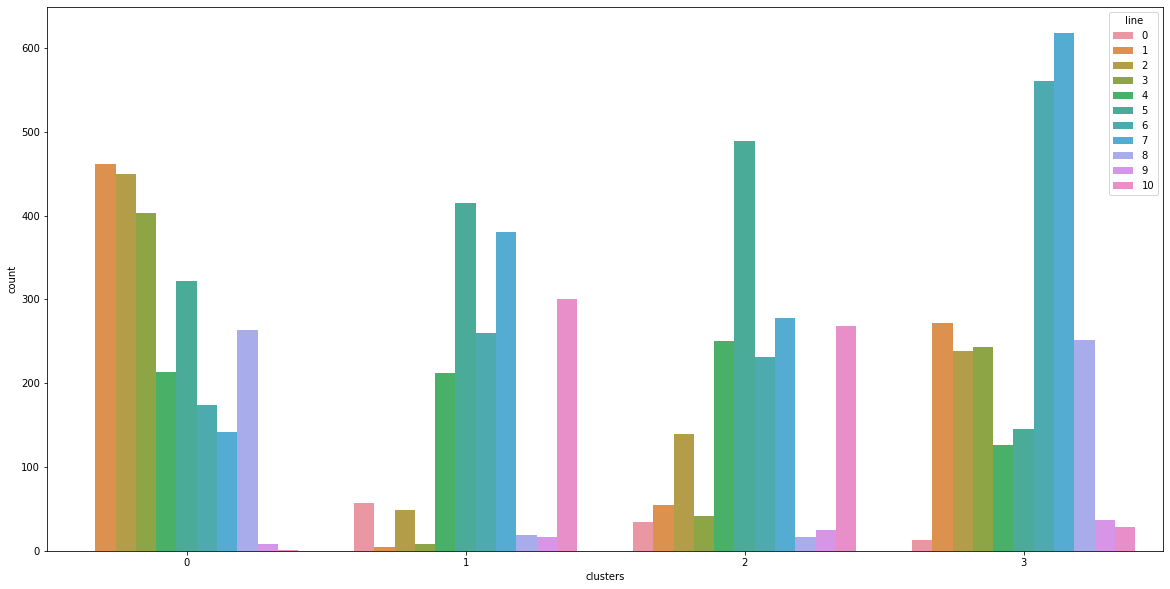

In [ ]:
#ASK MENTOR : is this what he meant by having all the lines on one chart?

plt.figure(figsize=(20,10))
sns.countplot(x='clusters', hue='line', data=friday_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

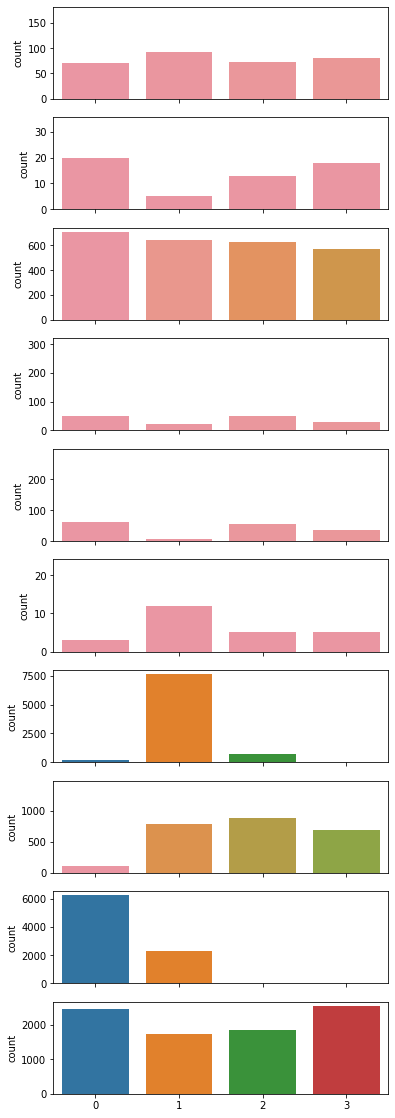

In [ ]:
#ANOTHER ATTEMPT
df1 = friday_df.select_dtypes([np.int, np.float])

n=len(df1.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*2), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = df1.columns[i]
    sns.countplot(df1[col].values);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

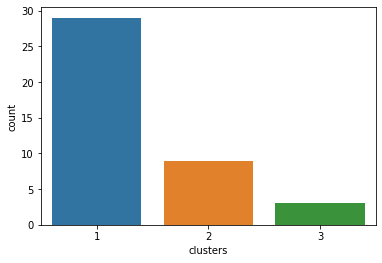

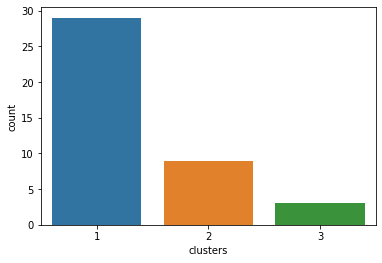

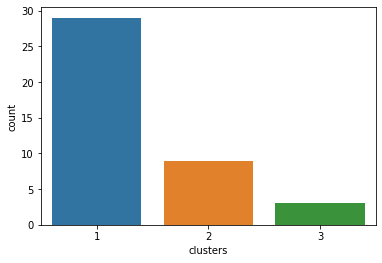

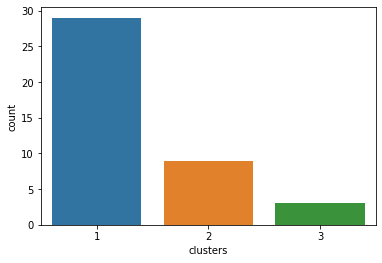

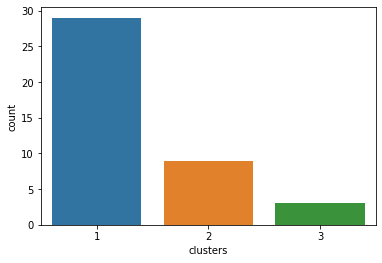

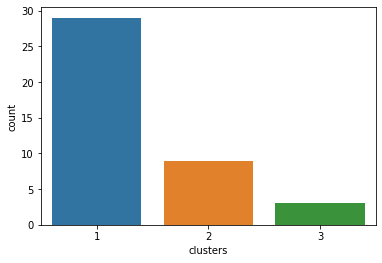

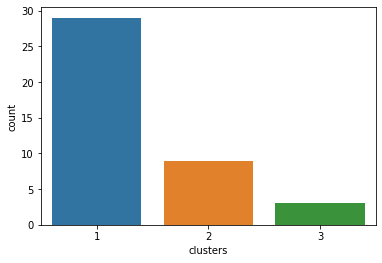

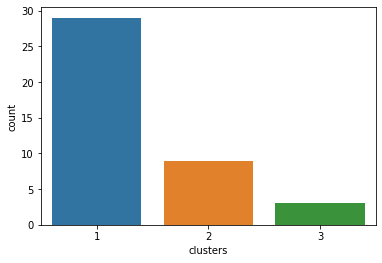

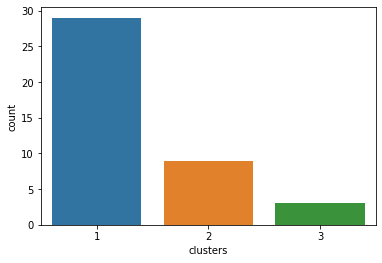

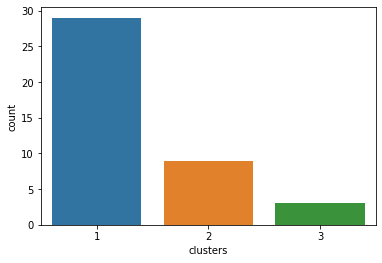

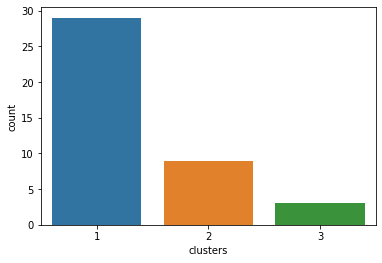

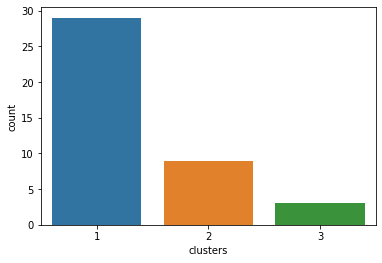

In [ ]:
#ONLY PRINTS THE FIRST COUNTPLOT
x = 0
figs = {}
for i in range(0, 12):
  df = friday_df.loc[(
    (friday_df['long_delay'] == 1) &
    (friday_df['line'] == 0)
    )] 
  plt.figure()
  sns.countplot(df['clusters'])
x = x+1



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


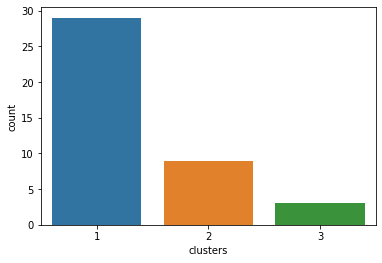

In [ ]:
df = friday_df.loc[(
    (friday_df['long_delay'] == 1) &
    (friday_df['line'] == 0 )
    )]
sns.countplot(df['clusters'])

In [ ]:
df_1 =  sample_data.loc[((sample_data['line'] == 1.0) & (sample_data['train_id'] == 251.0))]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


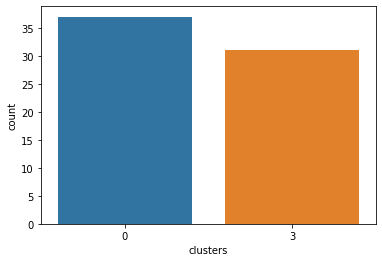

In [ ]:
sns.countplot(df_1['clusters'])

#Section 6 - Neural Network and results

**Analysis:** It would seem that neaural networks are unequivically bad for this type of prediction. One possible reason for this is that neural networks are designed for visual and audio data and not well suited for train schedules. 

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

,model_number,loss,evaluate_accuracy,class_report_accuracy,on_time_precision,on_time_recall,on_time_f1,on_time_support,late_precision,late_recall,late_f1,late_support
0,1,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
1,2,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
2,3,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
3,4,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
4,5,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
5,6,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
6,7,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
7,8,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
8,9,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
9,10,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424


##Setup

In [ ]:
#pip install tensorflow-gpu==2.0.0-rc1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split

from sklearn import metrics
#from sklearn.metrics import precision_recall_fscore_support as score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

enc_data = pd.read_csv('drive/My Drive/NJ Transit Project/enc_data.csv')
enc_data = enc_data.drop(columns=enc_data.iloc[:,:1])
enc_data.head()

Mounted at /content/drive


,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,0.0,562.0,0.0,101.0,101.0,82.0,1.0,7.0,0
1,0.0,562.0,1.0,101.0,136.0,90.0,1.0,7.0,0
2,0.0,562.0,2.0,136.0,104.0,98.0,1.0,7.0,0
3,0.0,562.0,3.0,104.0,102.0,103.0,1.0,7.0,0
4,0.0,562.0,4.0,102.0,106.0,107.0,1.0,7.0,0


In [ ]:
sample_data = enc_data.sample(n=150000)

In [ ]:
#input_dim = 8

X = sample_data.iloc[:,:-1]
y = sample_data.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

Y_train = to_categorical(y_train, num_classes = 2)
Y_test = to_categorical(y_test, num_classes = 2)

In [ ]:
X_train

,date,train_id,stop_sequence,from,to,scheduled_time,status,line
694766,85.0,705.0,1.0,122.0,123.0,757.0,2.0,9.0
1876408,238.0,591.0,8.0,76.0,77.0,694.0,1.0,7.0
5005929,657.0,302.0,10.0,130.0,153.0,1061.0,2.0,1.0
110828,14.0,930.0,2.0,139.0,21.0,207.0,1.0,10.0
3725796,476.0,1051.0,3.0,56.0,108.0,478.0,1.0,5.0
...,...,...,...,...,...,...,...,...
5430323,715.0,642.0,0.0,149.0,149.0,345.0,1.0,7.0
3203809,403.0,490.0,8.0,116.0,163.0,922.0,1.0,6.0
1468543,183.0,179.0,1.0,88.0,96.0,298.0,1.0,5.0
2618791,349.0,942.0,2.0,151.0,132.0,1002.0,1.0,10.0


In [ ]:
attempt = 0

model_number = []
loss = []
evaluate_accuracy = []
class_report_accuracy = []
on_time_precision = []
on_time_recall = []
on_time_f1 = []
on_time_support = []
late_precision = []
late_recall = []
late_f1 = []
late_support = []

###Part 1 - optimizer 

No optimizer stands out and all require the final layer to have 1 neuron to function. 'adam' will be used for the remainder of the project.

## Optimizer, 1 neuron in final layer

**Analysis:** No optimizer stands out. SGD does not work. 

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

,model_number,loss,evaluate_accuracy,class_report_accuracy,on_time_precision,on_time_recall,on_time_f1,on_time_support,late_precision,late_recall,late_f1,late_support
0,1,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
1,2,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
2,3,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
3,4,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
4,5,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
5,6,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424


### 1 - adadelta

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2526
Epoch 2/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2553
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2535
Epoch 4/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2549
Epoch 5/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2573
Epoch 6/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2569
Epoch 7/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2566
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2558
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 2 - adagrad

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2547
Epoch 2/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2530
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 4/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2534
Epoch 5/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 6/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2550
Epoch 7/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2531
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2532
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2556
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 3 - adam

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2535
Epoch 2/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2545
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2541
Epoch 4/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2547
Epoch 5/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2536
Epoch 6/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 7/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2533
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2553
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2553
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 4 - adamax

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2531
Epoch 2/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2564
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2553
Epoch 4/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2553
Epoch 5/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2557
Epoch 6/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2546
Epoch 7/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2538
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2553
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 5 - ftrl

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='ftrl', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2538
Epoch 2/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2562
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2557
Epoch 4/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2533
Epoch 5/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2569
Epoch 6/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2561
Epoch 7/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2529
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2549
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2533
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 6 - rmsprop

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 2/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2579
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2529
Epoch 4/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2572
Epoch 5/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2554
Epoch 6/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2549
Epoch 7/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2530
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2557
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2522
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### sgd

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
293/293 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.6238
Epoch 2/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7471
Epoch 3/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7466
Epoch 4/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7501
Epoch 5/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7408
Epoch 6/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7434
Epoch 7/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7473
Epoch 8/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7469
Epoch 9/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7430
Epoch 10/20
293/293 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7464
Epoch 11/20
293/293 [========

ValueError: ignored

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

## Optimizer, 2 neuron in final layer

**Analysis:** No optimizer works with 2 neurons in the final layer.  

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

### adadelta

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(2, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20


ValueError: ignored

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### adagrad

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(2, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### adam

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(2, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### adamax

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(2, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### ftrl

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(2, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='ftrl', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### rmsprop

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(2, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### sgd

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(2, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

## Part 2 - Layers and neurons

The methodology will be to have 16 neurons in the penultimate layer and doubling for each layer up to 5 layers. 

**Analysis:** There is no difference in the performance of any model. 

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

,model_number,loss,evaluate_accuracy,class_report_accuracy,on_time_precision,on_time_recall,on_time_f1,on_time_support,late_precision,late_recall,late_f1,late_support
0,1,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
1,2,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
2,3,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
3,4,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
4,5,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
5,6,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
6,7,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
7,8,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
8,9,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
9,10,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424


### 7

In [ ]:
ann = Sequential()
ann.add(Dense(16, input_dim = 8, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2577
Epoch 2/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2551
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2556
Epoch 4/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2534
Epoch 5/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2569
Epoch 6/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2560
Epoch 7/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2537
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2540
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 8

In [ ]:
ann = Sequential()
ann.add(Dense(32, input_dim = 8, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2521
Epoch 2/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2531
Epoch 3/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 4/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2536
Epoch 5/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2546
Epoch 6/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2575
Epoch 7/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2556
Epoch 8/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2541
Epoch 9/20
879/879 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2572
Epoch 10/20
879/879 [==============================] - 1s 1ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 9

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2541
Epoch 2/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2558
Epoch 3/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2535
Epoch 4/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2557
Epoch 5/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2533
Epoch 6/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2536
Epoch 7/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 8/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2535
Epoch 9/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2574
Epoch 10/20
879/879 [==============================] - 2s 2ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 10

In [ ]:
ann = Sequential()
ann.add(Dense(128, input_dim = 8, activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 2/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2564
Epoch 3/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2554
Epoch 4/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2537
Epoch 5/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2564
Epoch 6/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 7/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2541
Epoch 8/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2544
Epoch 9/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2537
Epoch 10/20
879/879 [==============================] - 2s 2ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 11

In [ ]:
ann = Sequential()
ann.add(Dense(256, input_dim = 8, activation='relu'))
ann.add(Dense(128, activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2557
Epoch 2/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2546
Epoch 3/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 4/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2549
Epoch 5/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2555
Epoch 6/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2540
Epoch 7/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 8/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2537
Epoch 9/20
879/879 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2539
Epoch 10/20
879/879 [==============================] - 3s 4ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

##Part 3 - New types of layers

3 layers will be used as there is no

**Analysis:** Flattening the layers has no impact on the effectiveness of the model.

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

,model_number,loss,evaluate_accuracy,class_report_accuracy,on_time_precision,on_time_recall,on_time_f1,on_time_support,late_precision,late_recall,late_f1,late_support
0,1,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
1,2,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
2,3,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
3,4,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
4,5,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
5,6,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
6,7,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
7,8,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
8,9,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
9,10,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424


### 12 -Flatten

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2540
Epoch 2/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2540
Epoch 3/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2538
Epoch 4/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 5/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 6/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2560
Epoch 7/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2545
Epoch 8/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2556
Epoch 9/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 10/20
879/879 [==============================] - 1s 2ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 13 - Flatten with large neurons

In [ ]:
ann = Sequential()
ann.add(Dense(1500, input_dim = 8, activation='relu'))
ann.add(Dense(500, activation='relu'))
ann.add(Dense(50, activation='relu'))
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2559
Epoch 2/20
879/879 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2519
Epoch 3/20
879/879 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 4/20
879/879 [==============================] - 19s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2567
Epoch 5/20
879/879 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2554
Epoch 6/20
879/879 [==============================] - 18s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2555
Epoch 7/20
879/879 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2530
Epoch 8/20
879/879 [==============================] - 19s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2544
Epoch 9/20
879/879 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2559
Epoch 10/20
879/879 [=========================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

##Part 4 - Activation functions

**Analysis:** The activation functionhas not impact on the effectiveness of the model.

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

,model_number,loss,evaluate_accuracy,class_report_accuracy,on_time_precision,on_time_recall,on_time_f1,on_time_support,late_precision,late_recall,late_f1,late_support
0,1,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
1,2,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
2,3,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
3,4,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
4,5,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
5,6,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
6,7,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
7,8,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
8,9,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
9,10,0.0,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424


### 14 - tanh

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='tanh'))
ann.add(Dense(32, activation='tanh'))
ann.add(Dense(16, activation='tanh'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2529
Epoch 2/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2529
Epoch 3/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2567
Epoch 4/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2544
Epoch 5/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2535
Epoch 6/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2557
Epoch 7/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2555
Epoch 8/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2552
Epoch 9/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2569
Epoch 10/20
879/879 [==============================] - 1s 2ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 15 - sigmoid

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='sigmoid'))
ann.add(Dense(32, activation='sigmoid'))
ann.add(Dense(16, activation='sigmoid'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2569
Epoch 2/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2554
Epoch 3/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2556
Epoch 4/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2553
Epoch 5/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2538
Epoch 6/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2556
Epoch 7/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2520
Epoch 8/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2548
Epoch 9/20
879/879 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2546
Epoch 10/20
879/879 [==============================] - 1s 2ms/st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

##Part 5 - Loss functions

**Analysis:** The loss function has no impact on the effectiveness of the model. 

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

,model_number,loss,evaluate_accuracy,class_report_accuracy,on_time_precision,on_time_recall,on_time_f1,on_time_support,late_precision,late_recall,late_f1,late_support
0,1,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
1,2,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
2,3,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
3,4,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
4,5,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
5,6,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
6,7,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
7,8,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
8,9,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
9,10,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424


### 16 - hinge

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='sigmoid'))
ann.add(Dense(32, activation='sigmoid'))
ann.add(Dense(16, activation='sigmoid'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4850 - accuracy: 0.2575
Epoch 2/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4965 - accuracy: 0.2518
Epoch 3/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4954 - accuracy: 0.2523
Epoch 4/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4883 - accuracy: 0.2558
Epoch 5/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4890 - accuracy: 0.2555
Epoch 6/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4918 - accuracy: 0.2541
Epoch 7/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4905 - accuracy: 0.2548
Epoch 8/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4892 - accuracy: 0.2554
Epoch 9/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4885 - accuracy: 0.2558
Epoch 10/20
879/879 [==============================] - 2s 2ms/step - loss: 1.4843 - accuracy: 0.2578

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 17 - mean squared error

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='sigmoid'))
ann.add(Dense(32, activation='sigmoid'))
ann.add(Dense(16, activation='sigmoid'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss=keras.losses.mean_squared_error, optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7428 - accuracy: 0.2572
Epoch 2/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7463 - accuracy: 0.2537
Epoch 3/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7438 - accuracy: 0.2562
Epoch 4/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7440 - accuracy: 0.2560
Epoch 5/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7461 - accuracy: 0.2539
Epoch 6/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7458 - accuracy: 0.2542
Epoch 7/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7443 - accuracy: 0.2557
Epoch 8/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7447 - accuracy: 0.2553
Epoch 9/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7452 - accuracy: 0.2548
Epoch 10/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7448 - accuracy: 0.2552

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

### 18 - mean absolute error

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='sigmoid'))
ann.add(Dense(32, activation='sigmoid'))
ann.add(Dense(16, activation='sigmoid'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss=keras.losses.mean_absolute_error, optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

Epoch 1/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7449 - accuracy: 0.2551
Epoch 2/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7448 - accuracy: 0.2552
Epoch 3/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7461 - accuracy: 0.2539
Epoch 4/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7436 - accuracy: 0.2564
Epoch 5/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7476 - accuracy: 0.2524
Epoch 6/20
879/879 [==============================] - 2s 2ms/step - loss: 0.7442 - accuracy: 0.2558
Epoch 7/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7424 - accuracy: 0.2576
Epoch 8/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7458 - accuracy: 0.2542
Epoch 9/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7442 - accuracy: 0.2558
Epoch 10/20
879/879 [==============================] - 1s 2ms/step - loss: 0.7452 - accuracy: 0.2548

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

,model_number,loss,evaluate_accuracy,class_report_accuracy,on_time_precision,on_time_recall,on_time_f1,on_time_support,late_precision,late_recall,late_f1,late_support
0,1,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
1,2,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
2,3,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
3,4,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
4,5,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
5,6,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
6,7,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
7,8,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
8,9,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424
9,10,0.000000,0.251307,0.251307,0.0,0.0,0.0,28076,0.251307,1.0,0.401671,9424


#Section 7 - Neural Network on a larger scale.

One possible problem with the previous attempts is the fact that the scale was relatively small for a neural network. I only used 150,000 samples and 20 epochs. In this final section I will attempt to run the network on all the data from the year 2019.

In [ ]:
df = pd.DataFrame()


df['model_number'] = model_number
df['loss'] = loss
df['evaluate_accuracy'] = evaluate_accuracy
df['class_report_accuracy'] = class_report_accuracy
df['on_time_precision'] = on_time_precision
df['on_time_recall'] = on_time_recall
df['on_time_f1'] = on_time_f1
df['on_time_support'] = on_time_support
df['late_precision'] = late_precision
df['late_recall'] = late_recall
df['late_f1'] = late_f1
df['late_support'] = late_support

df

In [ ]:
# saving model
import os
import joblib

##Setup

In [ ]:
#pip install tensorflow-gpu==2.0.0-rc1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split

from sklearn import metrics
#from sklearn.metrics import precision_recall_fscore_support as score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

enc_data = pd.read_csv('drive/My Drive/NJ Transit Project/enc_data.csv')
enc_data = enc_data.drop(columns=enc_data.iloc[:,:1])
enc_data.head()

Mounted at /content/drive


,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,0.0,562.0,0.0,101.0,101.0,82.0,1.0,7.0,0
1,0.0,562.0,1.0,101.0,136.0,90.0,1.0,7.0,0
2,0.0,562.0,2.0,136.0,104.0,98.0,1.0,7.0,0
3,0.0,562.0,3.0,104.0,102.0,103.0,1.0,7.0,0
4,0.0,562.0,4.0,102.0,106.0,107.0,1.0,7.0,0


In [ ]:
clean_data = pd.read_csv('drive/My Drive/NJ Transit Project/clean_data.csv')
clean_data = clean_data.drop(columns=clean_data.iloc[:,:1])
clean_data.head()

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
0,2018-03-01,3805,1.0,New York Penn Station,New York Penn Station,01:22:00,departed,Northeast Corrdr,False
1,2018-03-01,3805,2.0,New York Penn Station,Secaucus Upper Lvl,01:31:00,departed,Northeast Corrdr,False
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,Newark Penn Station,01:40:00,departed,Northeast Corrdr,False
3,2018-03-01,3805,4.0,Newark Penn Station,Newark Airport,01:45:00,departed,Northeast Corrdr,False
4,2018-03-01,3805,5.0,Newark Airport,North Elizabeth,01:49:00,departed,Northeast Corrdr,False


In [ ]:
clean_data[clean_data['date'].str[0:4] == '2019']

,date,train_id,stop_sequence,from,to,scheduled_time,status,line,long_delay
2320125,2019-01-01,545,1.0,Hoboken,Hoboken,23:08:00,departed,Montclair-Boonton,False
2320126,2019-01-01,545,2.0,Hoboken,Newark Broad Street,23:26:00,departed,Montclair-Boonton,True
2320127,2019-01-01,545,3.0,Newark Broad Street,Watsessing Avenue,23:38:00,estimated,Montclair-Boonton,False
2320128,2019-01-01,545,4.0,Watsessing Avenue,Bloomfield,23:40:00,estimated,Montclair-Boonton,False
2320129,2019-01-01,545,5.0,Bloomfield,Glen Ridge,23:43:00,estimated,Montclair-Boonton,False
...,...,...,...,...,...,...,...,...,...
5103047,2019-12-31,5445,12.0,Bound Brook,Bridgewater,19:24:00,departed,Raritan Valley,False
5103048,2019-12-31,5445,13.0,Bridgewater,Somerville,19:29:00,departed,Raritan Valley,False
5103049,2019-12-31,5445,14.0,Somerville,Raritan,19:36:00,estimated,Raritan Valley,False
5103050,2019-12-31,4138,1.0,Princeton,Princeton,12:50:00,departed,Princeton Shuttle,False


In [ ]:
sample_data = enc_data.iloc[2320125:5103052]

In [ ]:
#input_dim = 8

X = sample_data.iloc[:,:-1]
y = sample_data.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

Y_train = to_categorical(y_train, num_classes = 2)
Y_test = to_categorical(y_test, num_classes = 2)

In [ ]:
attempt = 0

model_number = []
loss = []
evaluate_accuracy = []
class_report_accuracy = []
on_time_precision = []
on_time_recall = []
on_time_f1 = []
on_time_support = []
late_precision = []
late_recall = []
late_f1 = []
late_support = []

## Model 1

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=128, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

Epoch 1/100
16307/16307 [==============================] - 28s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2782
Epoch 2/100
16307/16307 [==============================] - 25s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2787
Epoch 3/100
16307/16307 [==============================] - 25s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2788
Epoch 4/100
16307/16307 [==============================] - 25s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2786
Epoch 5/100
16307/16307 [==============================] - 25s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2789
Epoch 6/100
16307/16307 [==============================] - 26s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2785
Epoch 7/100
16307/16307 [==============================] - 26s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2783
Epoch 8/100
16307/16307 [==============================] - 26s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2786
Epoch 9/100
16307/16307 [==============================] - 26s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2784
Epoch 10/1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Model 2

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_dim = 8, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=1280, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

Epoch 1/100
Epoch 1/100
16307/16307 [==============================] - 30s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2785
Epoch 2/100
16307/16307 [==============================] - 29s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2782
Epoch 3/100
16307/16307 [==============================] - 29s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2788
Epoch 4/100
Epoch 4/100
16307/16307 [==============================] - 29s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2784
Epoch 5/100
16307/16307 [==============================] - 28s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2786
Epoch 6/100
16307/16307 [==============================] - 30s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2788
Epoch 7/100
16307/16307 [==============================] - 30s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2782
Epoch 8/100
16307/16307 [==============================] - 29s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2786
Epoch 9/100
16307/16307 [==============================] - 28s 2ms/step - loss: 0.0000e+00 - acc

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Model 3

All data

In [ ]:
#input_dim = 8

X = enc_data.iloc[:,:-1]
y = enc_data.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

Y_train = to_categorical(y_train, num_classes = 2)
Y_test = to_categorical(y_test, num_classes = 2)

In [ ]:
ann = Sequential()
ann.add(Dense(580, input_dim = 8, activation='relu'))
ann.add(Dense(290, activation='relu'))
ann.add(Dense(145, activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=1280, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

Epoch 1/100
36176/36176 [==============================] - 313s 9ms/step - loss: nan - accuracy: 0.4776
Epoch 2/100
36176/36176 [==============================] - 315s 9ms/step - loss: nan - accuracy: 0.7457
Epoch 3/100
36176/36176 [==============================] - 314s 9ms/step - loss: nan - accuracy: 0.7455
Epoch 4/100
36176/36176 [==============================] - 311s 9ms/step - loss: nan - accuracy: 0.7457
Epoch 5/100
36176/36176 [==============================] - 316s 9ms/step - loss: nan - accuracy: 0.7459
Epoch 6/100
36176/36176 [==============================] - 322s 9ms/step - loss: nan - accuracy: 0.7457
Epoch 7/100
36176/36176 [==============================] - 328s 9ms/step - loss: nan - accuracy: 0.7457
Epoch 8/100
36176/36176 [==============================] - 332s 9ms/step - loss: nan - accuracy: 0.7456
Epoch 9/100
36176/36176 [==============================] - 338s 9ms/step - loss: nan - accuracy: 0.7457
Epoch 10/100
36176/36176 [==============================] - 322s

KeyboardInterrupt: ignored

In [ ]:
ann_fit = ann.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1)
ann_compile = ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model = ann
# Save the model to drive
joblib.dump(ann_fit, 'drive/My Drive/NJ Transit Project/ann_fit.joblib')
joblib.dump(ann_compile, 'drive/My Drive/NJ Transit Project/ann_compile.joblib')
joblib.dump(ann_model, 'drive/My Drive/NJ Transit Project/ann_model.joblib')

## model 4 

In [ ]:
#input_dim = 8

X = enc_data.iloc[:,:-1]
y = enc_data.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

Y_train = to_categorical(y_train, num_classes = 2)
Y_test = to_categorical(y_test, num_classes = 2)

In [ ]:
ann = Sequential()
ann.add(Dense(1234, input_dim = 8, activation='relu'))
ann.add(Dense(617, activation='relu'))
ann.add(Dense(354, activation='relu'))
ann.add(Dense(177, activation='relu'))
ann.add(Dense(88, activation='relu'))
ann.add(Dense(44, activation='relu'))
ann.add(Dense(22, activation='relu'))
ann.add(Dense(11, activation='relu'))
ann.add(Flatten())
ann.add(Dense(1, activation='softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

score = ann.evaluate(X_test, y_test, batch_size=1280, verbose=1)
pred = ann.predict(X_test)
class_report = metrics.classification_report(y_test, pred, output_dict=True)

# If successful
attempt = attempt+1
model_number.append(attempt)


loss.append(score[0])
evaluate_accuracy.append(score[1])
class_report_accuracy.append(class_report['accuracy'])
on_time_precision.append(class_report['0']['precision'])
on_time_recall.append(class_report['0']['recall'])
on_time_f1.append(class_report['0']['f1-score'])
on_time_support.append(class_report['0']['support'])
late_precision.append(class_report['1']['precision'])
late_recall.append(class_report['1']['recall'])
late_f1.append(class_report['1']['f1-score'])
late_support.append(class_report['1']['support'])

Epoch 1/20
36176/36176 [==============================] - 1100s 30ms/step - loss: nan - accuracy: 0.6993
Epoch 2/20
36176/36176 [==============================] - 1127s 31ms/step - loss: nan - accuracy: 0.7459
Epoch 3/20
36176/36176 [==============================] - 1122s 31ms/step - loss: nan - accuracy: 0.7458
Epoch 4/20
36176/36176 [==============================] - 1102s 30ms/step - loss: nan - accuracy: 0.7459
Epoch 5/20
36176/36176 [==============================] - 1114s 31ms/step - loss: nan - accuracy: 0.7458
Epoch 6/20
36176/36176 [==============================] - 1108s 31ms/step - loss: nan - accuracy: 0.7456
Epoch 7/20
36176/36176 [==============================] - 1117s 31ms/step - loss: nan - accuracy: 0.7460
Epoch 8/20
36176/36176 [==============================] - 1131s 31ms/step - loss: nan - accuracy: 0.7454
Epoch 9/20
36176/36176 [==============================] - 1139s 31ms/step - loss: nan - accuracy: 0.7458
Epoch 10/20
36176/36176 [==============================